# Connect G-Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
myDirFiles = "/content/drive/MyDrive/Data Science/Python/DS Project III"
os.chdir(myDirFiles)

In [ ]:
!ls

 data_description.docx			   test.csv
'[Sandbox] House Price Prediction.ipynb'   train.csv


# I.1 General Exploration

In [ ]:
# Load libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#buat gambar stabil tdk keluar dari notebook

import seaborn as sns
sns.set(rc={"figure.figsize": (20, 15)})
#set figure by default
sns.set_style("whitegrid")
 #style white grid

import numpy as np

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
#labrary statistik
import statsmodels.formula.api as smf

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import norm
 #selisih antara 2 variable
from scipy import stats
from scipy.stats import chi2_contingency
 #untuk menganalisa data kategorik

In [ ]:
# Load Train set
df_train = pd.read_csv("train.csv")
print(f"Train set shape:\n{df_train.shape}\n")

# Load Test set
df_test = pd.read_csv("test.csv")
print(f"Test set shape:\n{df_test.shape}")

Train set shape:
(1460, 81)

Test set shape:
(1459, 80)


pembagian data training dan tes 75% 25% atau 80 20 persen
kalau ada training, tes dan validation 70% 20% 10%

In [ ]:
# info of each of the variables in our train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# list comprehension
myList = [1, 2, 3, 4]
[val**2 for val in myList]

[1, 4, 9, 16]

In [ ]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns] #
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [ ]:
df_train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [ ]:
# Drop the 'Id' column from the train set
df_train.drop(["Id"], axis=1, inplace=True)
# df_train.drop(columns=["Id"], inplace=True)

# Save the list of 'Id' before dropping it from the test set
Id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [ ]:
df_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
3         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
4         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2         NaN       0       3    2010        WD         Normal  
3         NaN       0       6    2010        WD         Normal  
4         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [ ]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

# I.2 Numerical Features

## I.2.1 Explore and Clean Numerical features

In [ ]:
# Let's select the columns of the train set with numerical data
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [ ]:
# Let's drop quasi-constant features where 95% of the values are similar or constant
# sel : selector
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance without features SalePrice
# kolom SalePrice dihapus sementara dulu baru di fit
#sel.fit(df_train_num.iloc[:, :-1]) # all cols except 'SalePrice'
sel.fit(df_train_num.drop(columns='SalePrice', inplace=False))

VarianceThreshold(threshold=0.05)

In [ ]:
#get_support untuk menghasilkan array bools yang true untuk feature dengan VarianceThreshold lbh besar
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
sum([True, True])

2

In [ ]:
# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

Number of retained features: 35

Number of quasi_constant features: 1


 - **len(df_train_num.iloc[:, :-1].columns)** menghitung jumlah kolom dalam dataset awal, dengan menghilangkan kolom target ('SalePrice') dari perhitungan **(df_train_num.iloc[:, :-1])**.

 - **sum(sel.get_support())** adalah jumlah fitur yang telah Anda pilih untuk dipertahankan dengan VarianceThreshold.

In [ ]:
#klo gini aja semua kolom kepanggil kecuali kolom terakhir SalePrice
df_train_num.iloc[:, :-1].columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
df_train_num.iloc[:, :-1].columns[sel.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
df_train_num.iloc[:, :-1].columns[~sel.get_support()]

Index(['KitchenAbvGr'], dtype='object')

In [ ]:
df_train.KitchenAbvGr.value_counts(normalize=True)

1    0.953425
2    0.044521
3    0.001370
0    0.000685
Name: KitchenAbvGr, dtype: float64

In [ ]:
# Notes!
# Example Case
myArr = np.array([1, 2, 3, 4])
myFilter = np.array([True, True, True, False])
myArr[myFilter]

array([1, 2, 3])

In [ ]:
myArr[~myFilter]

array([4])

In [ ]:
quasi_constant_features_list = (
    df_train_num
    .iloc[:, :-1]
    .columns[~sel.get_support()]
    .tolist()
)

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


Quasi-constant features to be dropped: ['KitchenAbvGr']


In [ ]:
df_train["KitchenAbvGr"].value_counts(dropna=False).sort_index()

0       1
1    1392
2      65
3       2
Name: KitchenAbvGr, dtype: int64

In [ ]:
df_train["KitchenAbvGr"].value_counts(normalize=True).sort_index()

0    0.000685
1    0.953425
2    0.044521
3    0.001370
Name: KitchenAbvGr, dtype: float64

In [ ]:
# Let's drop these columns from df_train_num
df_train_num.drop(
    quasi_constant_features_list,
    axis=1,
    inplace=True
)

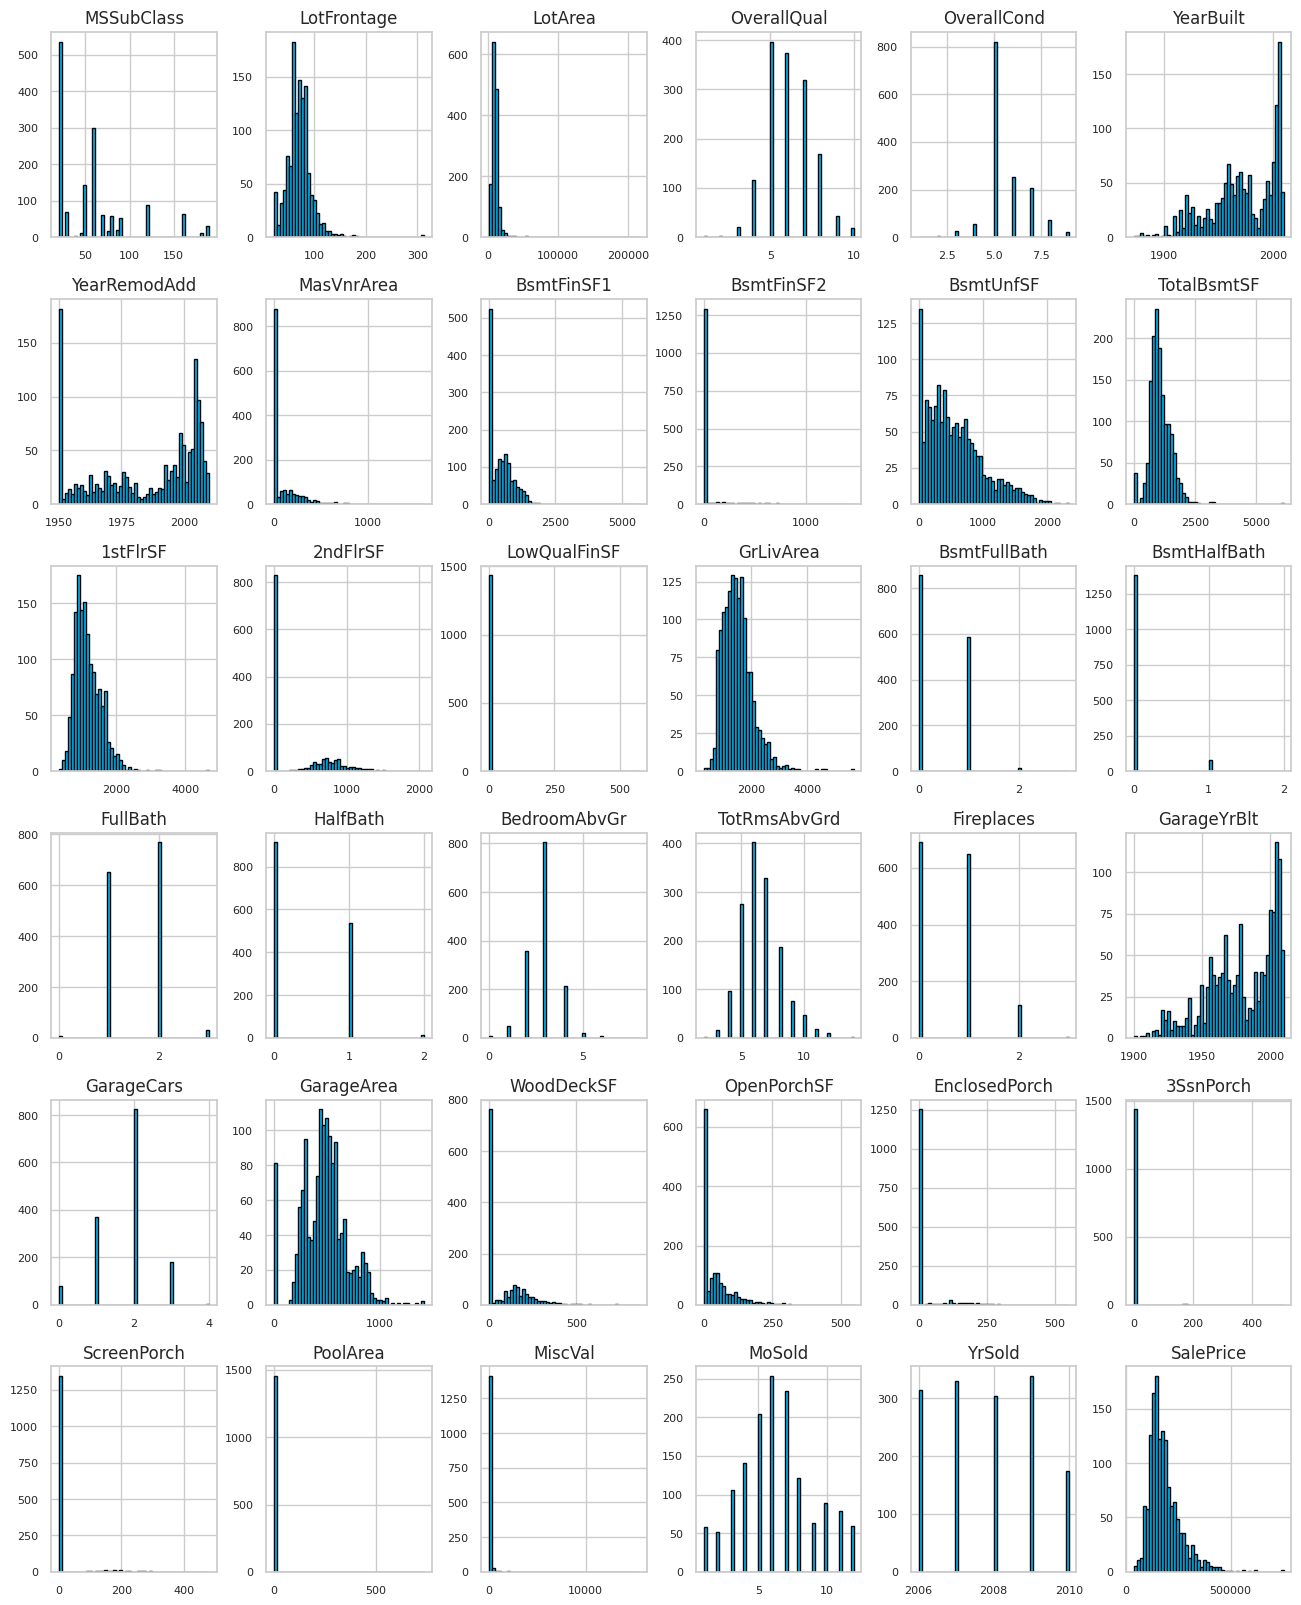

In [ ]:
# Plot the distribution of all the numerical data
fig_ = df_train_num.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

In [ ]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
# Define correlation matrix
corr_matrix = df_train_num.corr()
corr_matrix

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.39    -0.14         0.03        -0.06   
LotFrontage         -0.39         1.00     0.43         0.25        -0.06   
LotArea             -0.14         0.43     1.00         0.11        -0.01   
OverallQual          0.03         0.25     0.11         1.00        -0.09   
OverallCond         -0.06        -0.06    -0.01        -0.09         1.00   
YearBuilt            0.03         0.12     0.01         0.57        -0.38   
YearRemodAdd         0.04         0.09     0.01         0.55         0.07   
MasVnrArea           0.02         0.19     0.10         0.41        -0.13   
BsmtFinSF1          -0.07         0.23     0.21         0.24        -0.05   
BsmtFinSF2          -0.07         0.05     0.11        -0.06         0.04   
BsmtUnfSF           -0.14         0.13    -0.00         0.31        -0.14   
TotalBsmtSF         -0.24         0.39     0.26         0.54        -0.17   
1stFlrSF            -0.25         0.46     0.30         0.48        -0.14   
2ndFlrSF             0.31         0.08     0.05         0.30         0.03   
LowQualFinSF         0.05         0.04     0.00        -0.03         0.03   
GrLivArea            0.07         0.40     0.26         0.59        -0.08   
BsmtFullBath         0.00         0.10     0.16         0.11        -0.05   
BsmtHalfBath        -0.00        -0.01     0.05        -0.04         0.12   
FullBath             0.13         0.20     0.13         0.55        -0.19   
HalfBath             0.18         0.05     0.01         0.27        -0.06   
BedroomAbvGr        -0.02         0.26     0.12         0.10         0.01   
TotRmsAbvGrd         0.04         0.35     0.19         0.43        -0.06   
Fireplaces          -0.05         0.27     0.27         0.40        -0.02   
GarageYrBlt          0.09         0.07    -0.02         0.55        -0.32   
GarageCars          -0.04         0.29     0.15         0.60        -0.19   
GarageArea          -0.10         0.34     0.18         0.56        -0.15   
WoodDeckSF          -0.01         0.09     0.17         0.24        -0.00   
OpenPorchSF         -0.01         0.15     0.08         0.31        -0.03   
EnclosedPorch       -0.01         0.01    -0.02        -0.11         0.07   
3SsnPorch           -0.04         0.07     0.02         0.03         0.03   
ScreenPorch         -0.03         0.04     0.04         0.06         0.05   
PoolArea             0.01         0.21     0.08         0.07        -0.00   
MiscVal             -0.01         0.00     0.04        -0.03         0.07   
MoSold              -0.01         0.01     0.00         0.07        -0.00   
YrSold              -0.02         0.01    -0.01        -0.03         0.04   
SalePrice           -0.08         0.35     0.26         0.79        -0.08   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.03          0.04        0.02       -0.07       -0.07   
LotFrontage         0.12          0.09        0.19        0.23        0.05   
LotArea             0.01          0.01        0.10        0.21        0.11   
OverallQual         0.57          0.55        0.41        0.24       -0.06   
OverallCond        -0.38          0.07       -0.13       -0.05        0.04   
YearBuilt           1.00          0.59        0.32        0.25       -0.05   
YearRemodAdd        0.59          1.00        0.18        0.13       -0.07   
MasVnrArea          0.32          0.18        1.00        0.26       -0.07   
BsmtFinSF1          0.25          0.13        0.26        1.00       -0.05   
BsmtFinSF2         -0.05         -0.07       -0.07       -0.05        1.00   
BsmtUnfSF           0.15          0.18        0.11       -0.50       -0.21   
TotalBsmtSF         0.39          0.29        0.36        0.52        0.10   
1stFlrSF            0.28          0.24        0.34        0.45        0.10   
2ndFlrSF            0.01          0.14        0.17       -0.14       -0.1

kolerasi antara independen variable jangan tinggi jika ada yg tinggi gunakan salah satu, putuskan mana yang ingin dipakai itu membuat kopleksitas yang tinggi untuk ML kita

In [ ]:
# Replace correlation < |0.3| by 0 for a better visibility
low_corr_filter = (corr_matrix < 0.3) & (corr_matrix > -0.3)
corr_matrix[low_corr_filter] = 0
corr_matrix

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass           1.00        -0.39     0.00         0.00         0.00   
LotFrontage         -0.39         1.00     0.43         0.00         0.00   
LotArea              0.00         0.43     1.00         0.00         0.00   
OverallQual          0.00         0.00     0.00         1.00         0.00   
OverallCond          0.00         0.00     0.00         0.00         1.00   
YearBuilt            0.00         0.00     0.00         0.57        -0.38   
YearRemodAdd         0.00         0.00     0.00         0.55         0.00   
MasVnrArea           0.00         0.00     0.00         0.41         0.00   
BsmtFinSF1           0.00         0.00     0.00         0.00         0.00   
BsmtFinSF2           0.00         0.00     0.00         0.00         0.00   
BsmtUnfSF            0.00         0.00     0.00         0.31         0.00   
TotalBsmtSF          0.00         0.39     0.00         0.54         0.00   
1stFlrSF             0.00         0.46     0.00         0.48         0.00   
2ndFlrSF             0.31         0.00     0.00         0.00         0.00   
LowQualFinSF         0.00         0.00     0.00         0.00         0.00   
GrLivArea            0.00         0.40     0.00         0.59         0.00   
BsmtFullBath         0.00         0.00     0.00         0.00         0.00   
BsmtHalfBath         0.00         0.00     0.00         0.00         0.00   
FullBath             0.00         0.00     0.00         0.55         0.00   
HalfBath             0.00         0.00     0.00         0.00         0.00   
BedroomAbvGr         0.00         0.00     0.00         0.00         0.00   
TotRmsAbvGrd         0.00         0.35     0.00         0.43         0.00   
Fireplaces           0.00         0.00     0.00         0.40         0.00   
GarageYrBlt          0.00         0.00     0.00         0.55        -0.32   
GarageCars           0.00         0.00     0.00         0.60         0.00   
GarageArea           0.00         0.34     0.00         0.56         0.00   
WoodDeckSF           0.00         0.00     0.00         0.00         0.00   
OpenPorchSF          0.00         0.00     0.00         0.31         0.00   
EnclosedPorch        0.00         0.00     0.00         0.00         0.00   
3SsnPorch            0.00         0.00     0.00         0.00         0.00   
ScreenPorch          0.00         0.00     0.00         0.00         0.00   
PoolArea             0.00         0.00     0.00         0.00         0.00   
MiscVal              0.00         0.00     0.00         0.00         0.00   
MoSold               0.00         0.00     0.00         0.00         0.00   
YrSold               0.00         0.00     0.00         0.00         0.00   
SalePrice            0.00         0.35     0.00         0.79         0.00   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass          0.00          0.00        0.00        0.00        0.00   
LotFrontage         0.00          0.00        0.00        0.00        0.00   
LotArea             0.00          0.00        0.00        0.00        0.00   
OverallQual         0.57          0.55        0.41        0.00        0.00   
OverallCond        -0.38          0.00        0.00        0.00        0.00   
YearBuilt           1.00          0.59        0.32        0.00        0.00   
YearRemodAdd        0.59          1.00        0.00        0.00        0.00   
MasVnrArea          0.32          0.00        1.00        0.00        0.00   
BsmtFinSF1          0.00          0.00        0.00        1.00        0.00   
BsmtFinSF2          0.00          0.00        0.00        0.00        1.00   
BsmtUnfSF           0.00          0.00        0.00       -0.50        0.00   
TotalBsmtSF         0.39          0.00        0.36        0.52        0.00   
1stFlrSF            0.00          0.00        0.34        0.45        0.00   
2ndFlrSF            0.00          0.00        0.00        0.00        0.0

In [ ]:
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

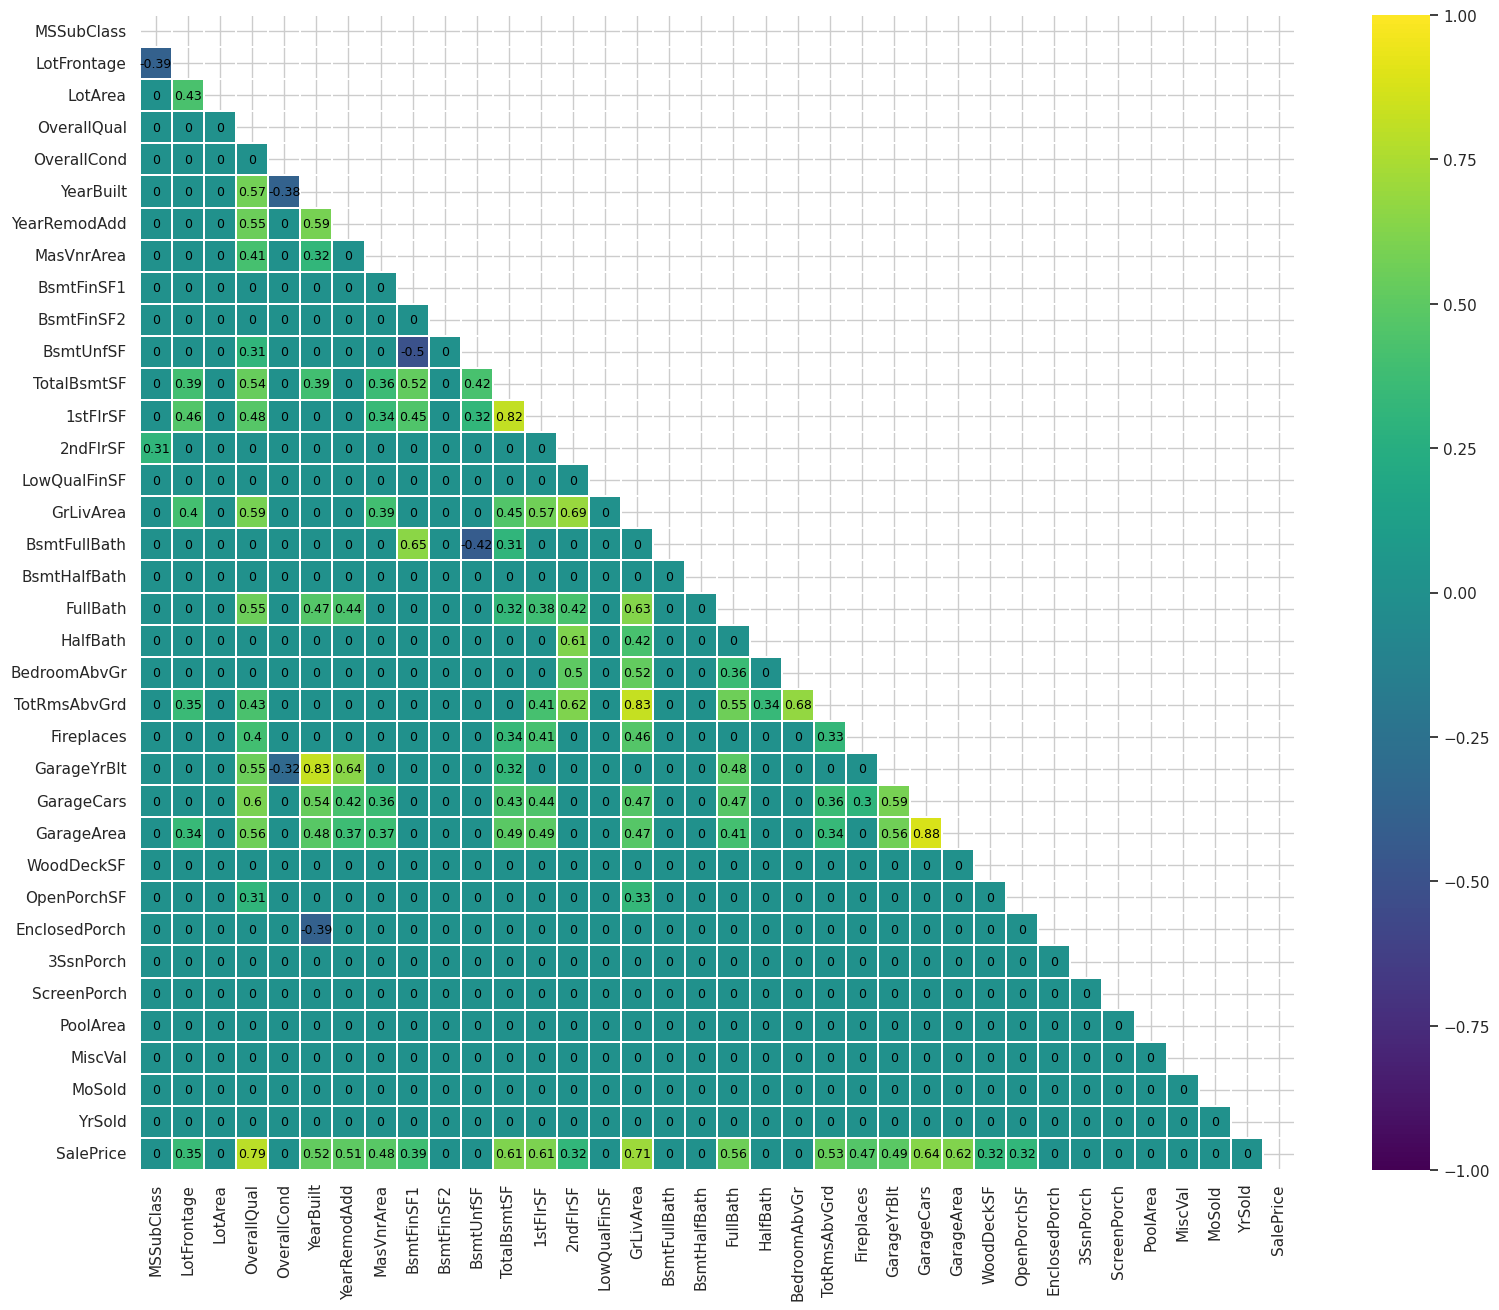

In [ ]:
# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(
    data = corr_matrix,
    mask = mask, # cover, not showing them which masked True
    vmax = 1.0,
    vmin = -1.0,
    linewidths = 0.1,
    annot_kws = {
        "size": 9,
        "color": "black"
    },
    square = True,
    cmap = cmap,
    annot = True
);

In [ ]:
# Let's select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
df_num_corr = df_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(low_features_list)} slightly correlated values with SalePrice:\n{low_features_list}")

10 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 slightly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


In [ ]:
len(high_features_list)

10

In [ ]:
high_features_list.sort_values()

YearRemodAdd   0.51
YearBuilt      0.52
TotRmsAbvGrd   0.53
FullBath       0.56
1stFlrSF       0.61
TotalBsmtSF    0.61
GarageArea     0.62
GarageCars     0.64
GrLivArea      0.71
OverallQual    0.79
Name: SalePrice, dtype: float64

In [ ]:
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].tolist()

In [ ]:
strong_features

[0.7909816005838053,
 0.5228973328794967,
 0.5071009671113866,
 0.6135805515591943,
 0.6058521846919153,
 0.7086244776126515,
 0.5606637627484453,
 0.5337231555820284,
 0.6404091972583519,
 0.6234314389183622]

 - **round(len(strong_features) / 3)**: Bagian ini menghitung jumlah baris yang akan ada dalam grid subplot. Ini dilakukan dengan mengambil panjang (jumlah elemen) dari strong_features (daftar fitur-fitur yang memiliki korelasi tinggi) dan membaginya dengan 3. Fungsi **round()** digunakan untuk membulatkan hasil pembagian, sehingga Anda mendapatkan jumlah baris yang sesuai.

 - **3: Angka 3** dalam kode ini adalah jumlah kolom dalam grid subplot. Dalam hal ini, Anda ingin memiliki 3 kolom dalam setiap baris.

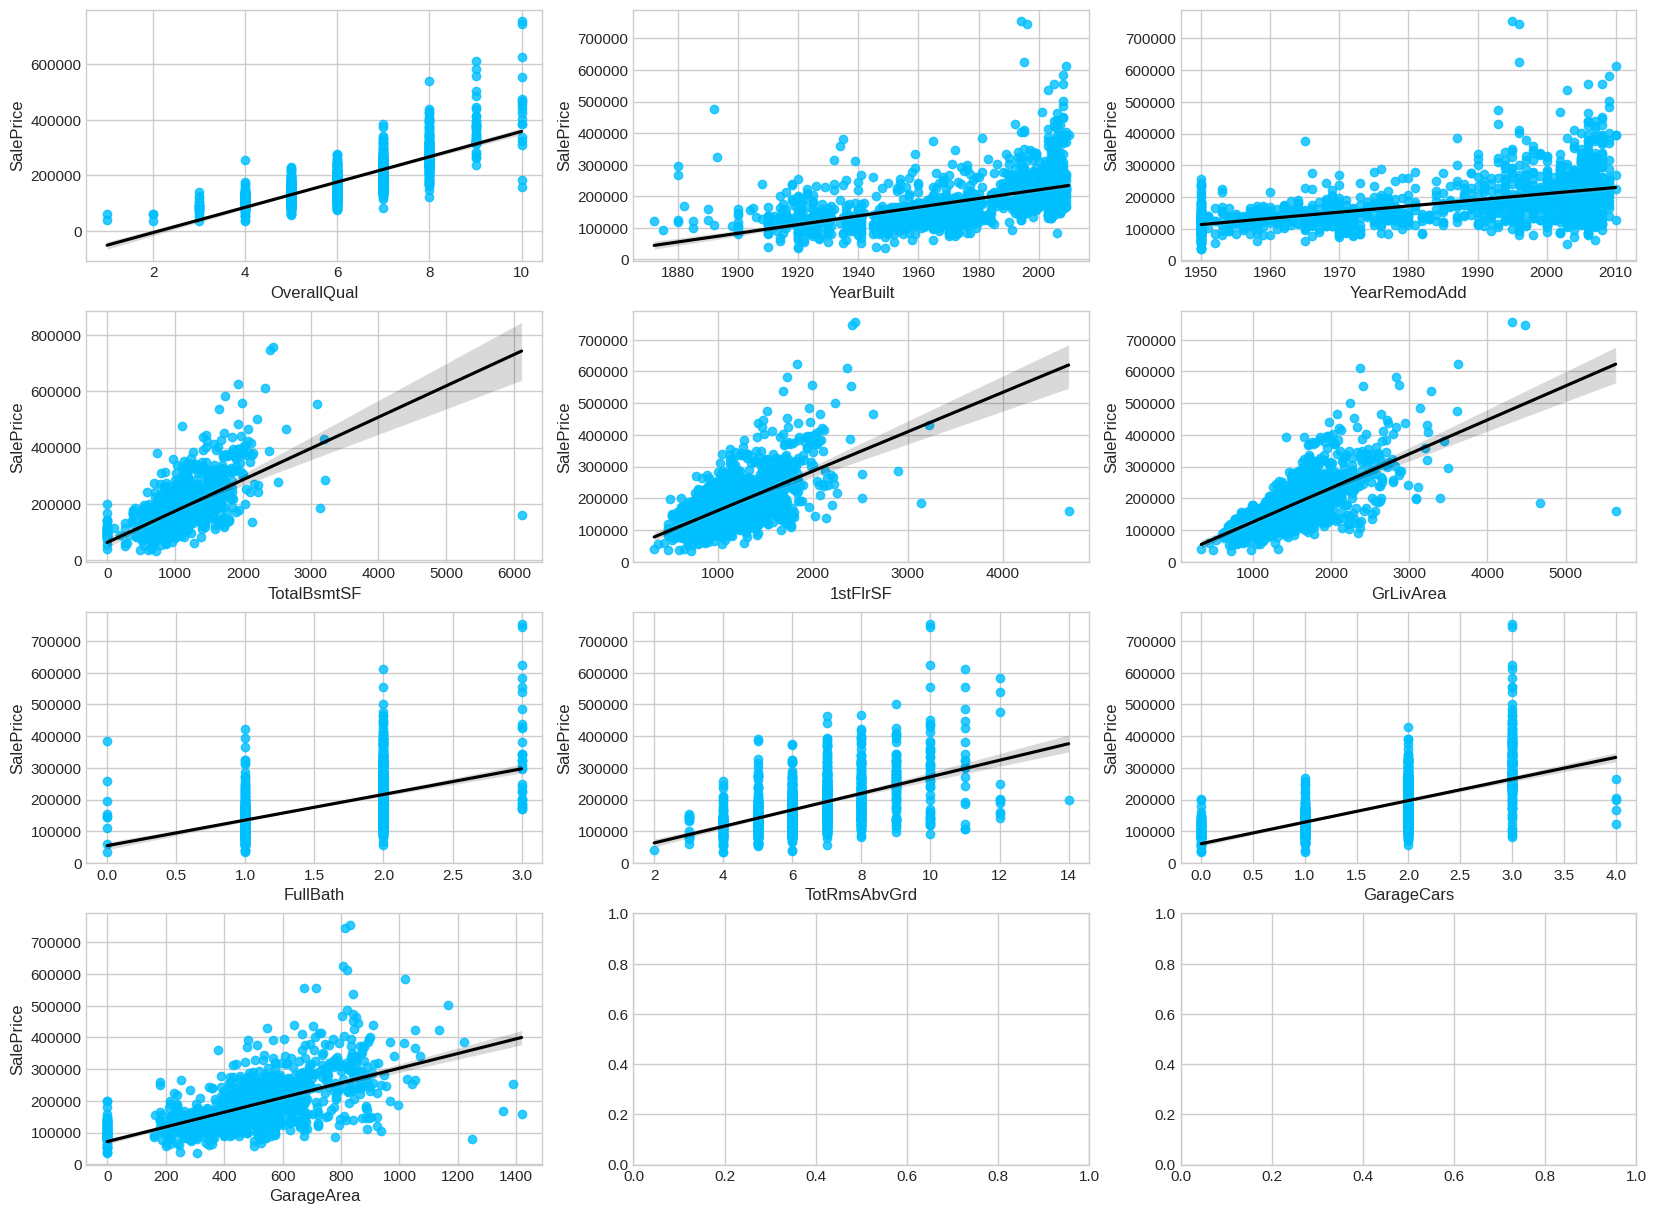

In [ ]:
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    # without SalePrice i < len(strong_features)-1
    if i < len(strong_features)-1:
        sns.regplot(
            x=strong_features[i],
            y="SalePrice",
            data=df_strong_features,
            ax=ax,
            scatter_kws= {"color": "deepskyblue"},
            line_kws={"color": "black"}
        )

In [ ]:
strong_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [ ]:
df_strong_features

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078      1078       1078   
1459            5       1965          1965         1256      1256       1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0            2             8           2         548     208500  
1            2             6           2         460     181500  
2            2             6           2         608     223500  
3            1             7           3         642     140000  
4            2             9           3         836     250000  
...        ...           ...         ...         ...        ...  
1455         2             7           2         460     175000  
1456         2             7           2         500     210000  
1457         2             9           1         252     266500  
1458         1             5           1         240     142125  
1459         1             6           1         276     147500  

[1460 rows x 11 columns]

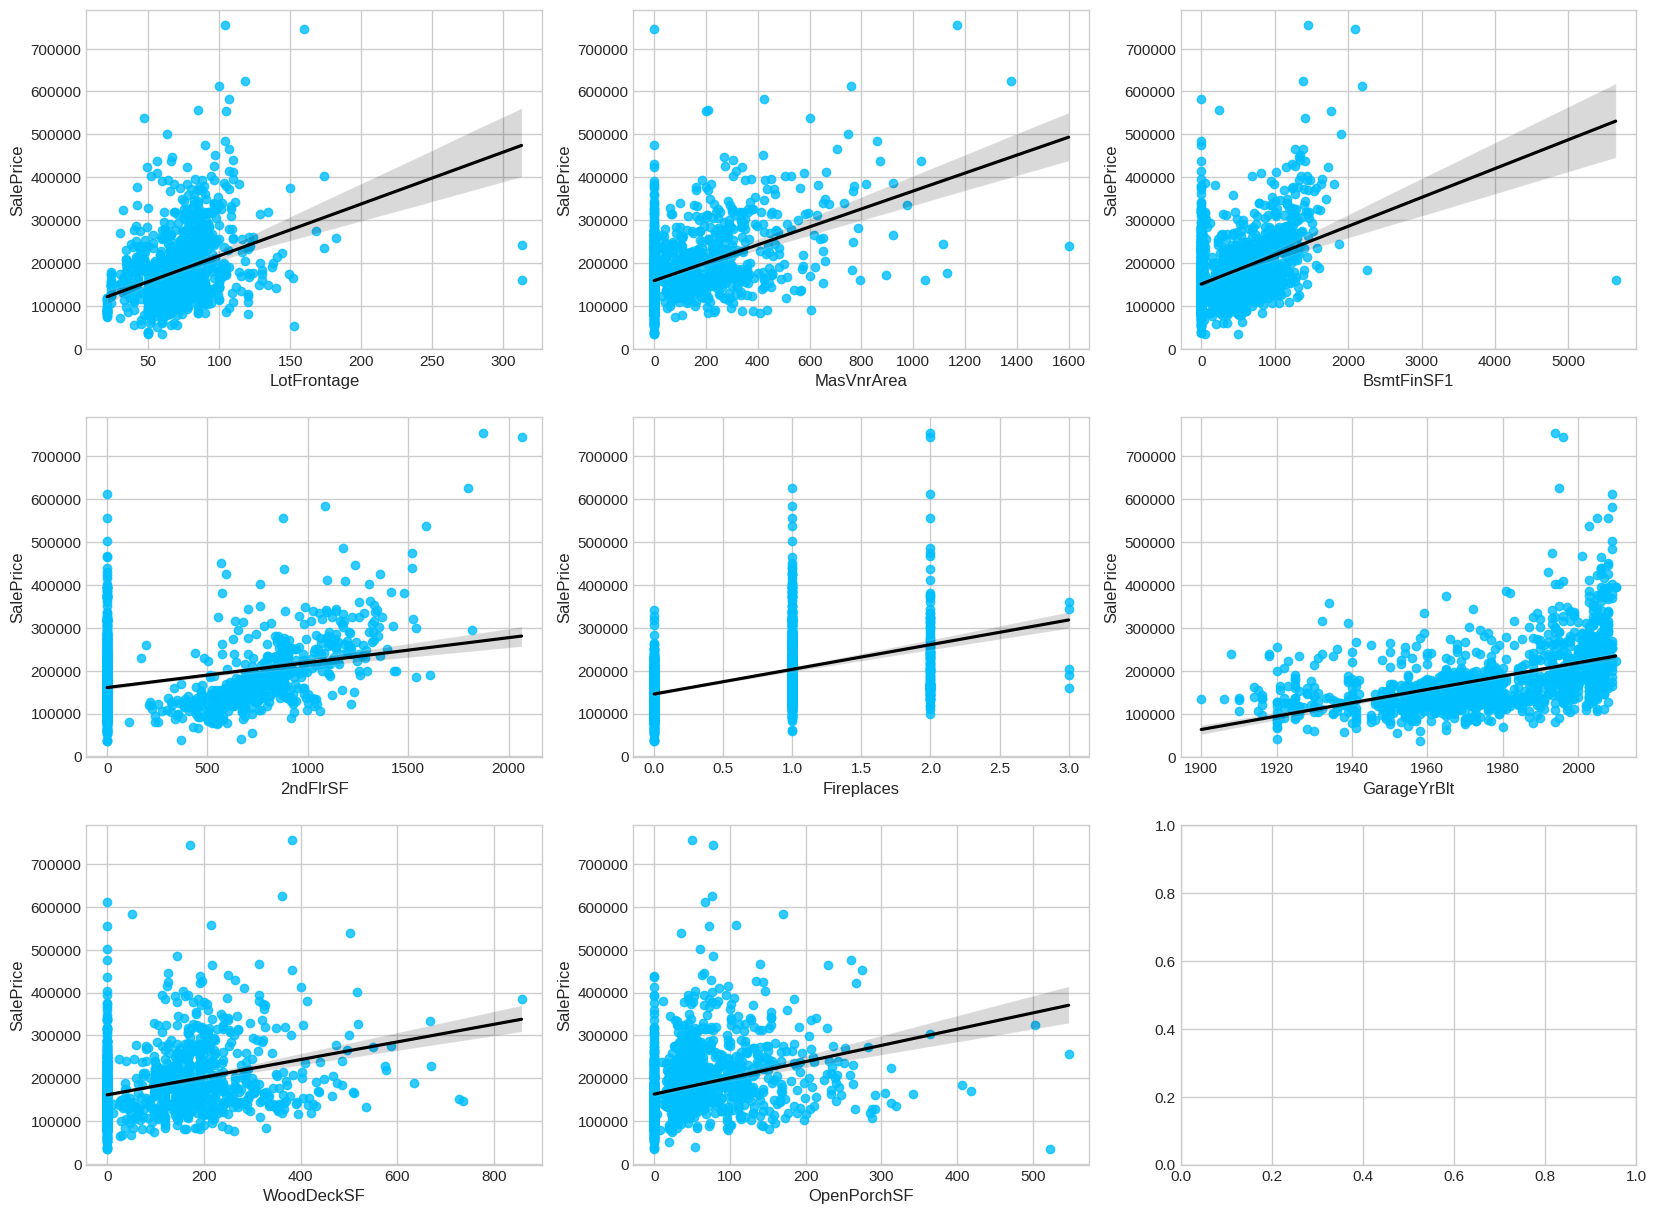

In [ ]:
# Features with low correlation (between 0.3 and 0.5)
low_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (abs(df_num_corr) < 0.5)].index.tolist()
low_features.append("SalePrice")

df_low_features = df_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(
            x=low_features[i],
            y="SalePrice",
            data=df_low_features,
            ax=ax,
            scatter_kws={"color": "deepskyblue"},
            line_kws={"color": "black"}
        )

In [ ]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

In [ ]:
list_of_numerical_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

## I.2.2 Missing data of Numerical features

Train Set

**.any()**: Metode ini digunakan pada DataFrame hasil dari df_train_num.isnull() untuk menguji apakah ada setidaknya satu nilai True dalam setiap kolom. Jadi, jika suatu kolom mengandung setidaknya satu nilai yang hilang, maka hasil dari df_train_num.isnull().any() untuk kolom tersebut akan menjadi True.

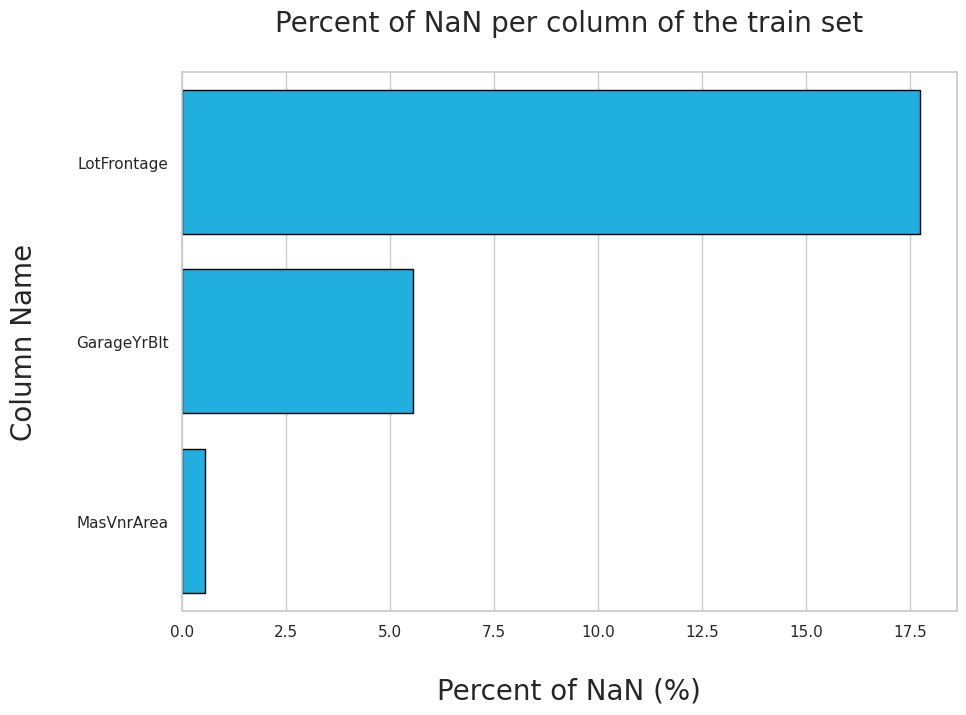

In [ ]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20);

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.head()

0        1        2        3        4        5    6    7    8      9   \
0 7.00 2,003.00 2,003.00   856.00   856.00 1,710.00 2.00 8.00 2.00 548.00   
1 6.00 1,976.00 1,976.00 1,262.00 1,262.00 1,262.00 2.00 6.00 2.00 460.00   
2 7.00 2,001.00 2,002.00   920.00   920.00 1,786.00 2.00 6.00 2.00 608.00   
3 7.00 1,915.00 1,970.00   756.00   961.00 1,717.00 1.00 7.00 3.00 642.00   
4 8.00 2,000.00 2,000.00 1,145.00 1,145.00 2,198.00 2.00 9.00 3.00 836.00   

     10     11     12       13   14       15     16    17         18  
0 65.00 196.00 706.00   854.00 0.00 2,003.00   0.00 61.00 208,500.00  
1 80.00   0.00 978.00     0.00 1.00 1,976.00 298.00  0.00 181,500.00  
2 68.00 162.00 486.00   866.00 1.00 2,001.00   0.00 42.00 223,500.00  
3 60.00   0.00 216.00   756.00 1.00 1,998.00   0.00 35.00 140,000.00  
4 84.00 350.00 655.00 1,053.00 1.00 2,000.00 192.00 84.00 250,000.00

In [ ]:
df_train_imputed.columns = df_train_num.columns
df_train_imputed.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0         7.00   2,003.00      2,003.00       856.00    856.00   1,710.00   
1         6.00   1,976.00      1,976.00     1,262.00  1,262.00   1,262.00   
2         7.00   2,001.00      2,002.00       920.00    920.00   1,786.00   
3         7.00   1,915.00      1,970.00       756.00    961.00   1,717.00   
4         8.00   2,000.00      2,000.00     1,145.00  1,145.00   2,198.00   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  LotFrontage  MasVnrArea  \
0      2.00          8.00        2.00      548.00        65.00      196.00   
1      2.00          6.00        2.00      460.00        80.00        0.00   
2      2.00          6.00        2.00      608.00        68.00      162.00   
3      1.00          7.00        3.00      642.00        60.00        0.00   
4      2.00          9.00        3.00      836.00        84.00      350.00   

   BsmtFinSF1  2ndFlrSF  Fireplaces  GarageYrBlt  WoodDeckSF  OpenPorchSF  \
0      706.00    854.00        0.00     2,003.00        0.00        61.00   
1      978.00      0.00        1.00     1,976.00      298.00         0.00   
2      486.00    866.00        1.00     2,001.00        0.00        42.00   
3      216.00    756.00        1.00     1,998.00        0.00        35.00   
4      655.00  1,053.00        1.00     2,000.00      192.00        84.00   

   SalePrice  
0 208,500.00  
1 181,500.00  
2 223,500.00  
3 140,000.00  
4 250,000.00

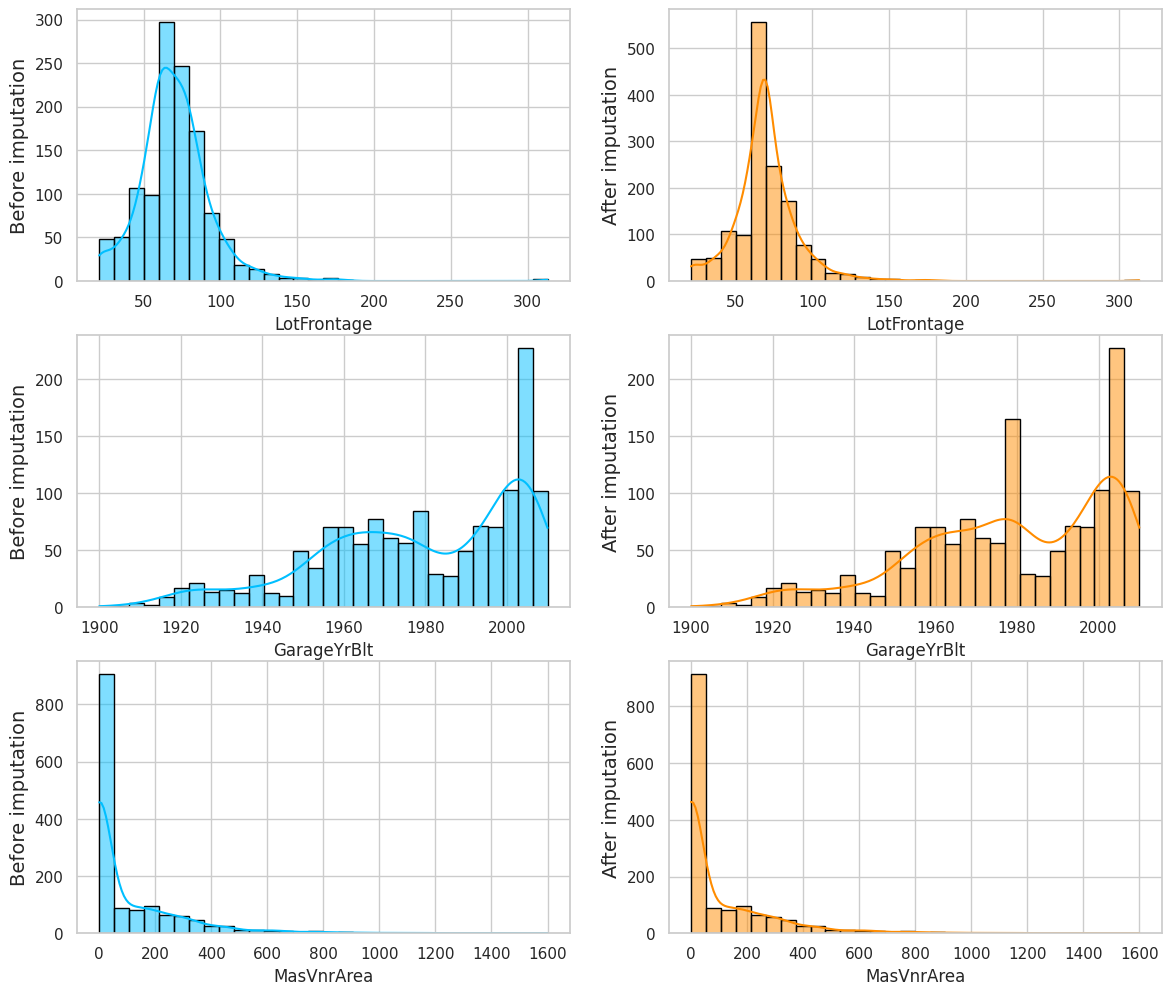

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

In [ ]:
# Drop 'LotFrontage' and 'GarageYrBlt'
df_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
df_train_imputed.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0         7.00   2,003.00      2,003.00       856.00    856.00   1,710.00   
1         6.00   1,976.00      1,976.00     1,262.00  1,262.00   1,262.00   
2         7.00   2,001.00      2,002.00       920.00    920.00   1,786.00   
3         7.00   1,915.00      1,970.00       756.00    961.00   1,717.00   
4         8.00   2,000.00      2,000.00     1,145.00  1,145.00   2,198.00   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  MasVnrArea  BsmtFinSF1  \
0      2.00          8.00        2.00      548.00      196.00      706.00   
1      2.00          6.00        2.00      460.00        0.00      978.00   
2      2.00          6.00        2.00      608.00      162.00      486.00   
3      1.00          7.00        3.00      642.00        0.00      216.00   
4      2.00          9.00        3.00      836.00      350.00      655.00   

   2ndFlrSF  Fireplaces  WoodDeckSF  OpenPorchSF  SalePrice  
0    854.00        0.00        0.00        61.00 208,500.00  
1      0.00        1.00      298.00         0.00 181,500.00  
2    866.00        1.00        0.00        42.00 223,500.00  
3    756.00        1.00        0.00        35.00 140,000.00  
4  1,053.00        1.00      192.00        84.00 250,000.00

Test Set

In [ ]:
# Drop the same features from test set as for the train set
df_test_num.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)

Text(0, 0.5, 'Column Name\n')

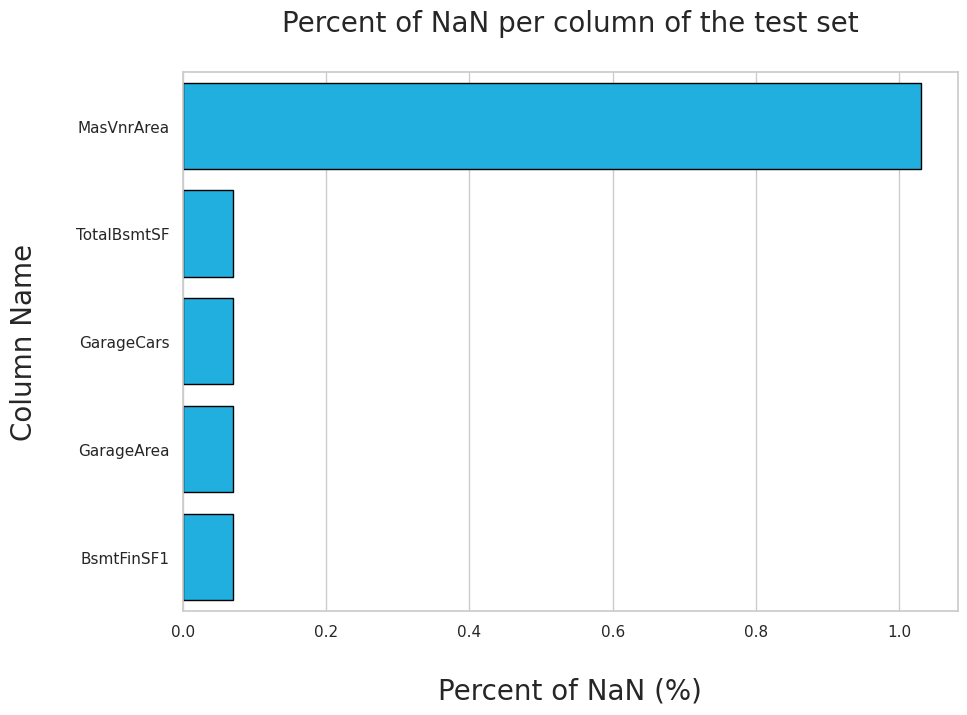

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

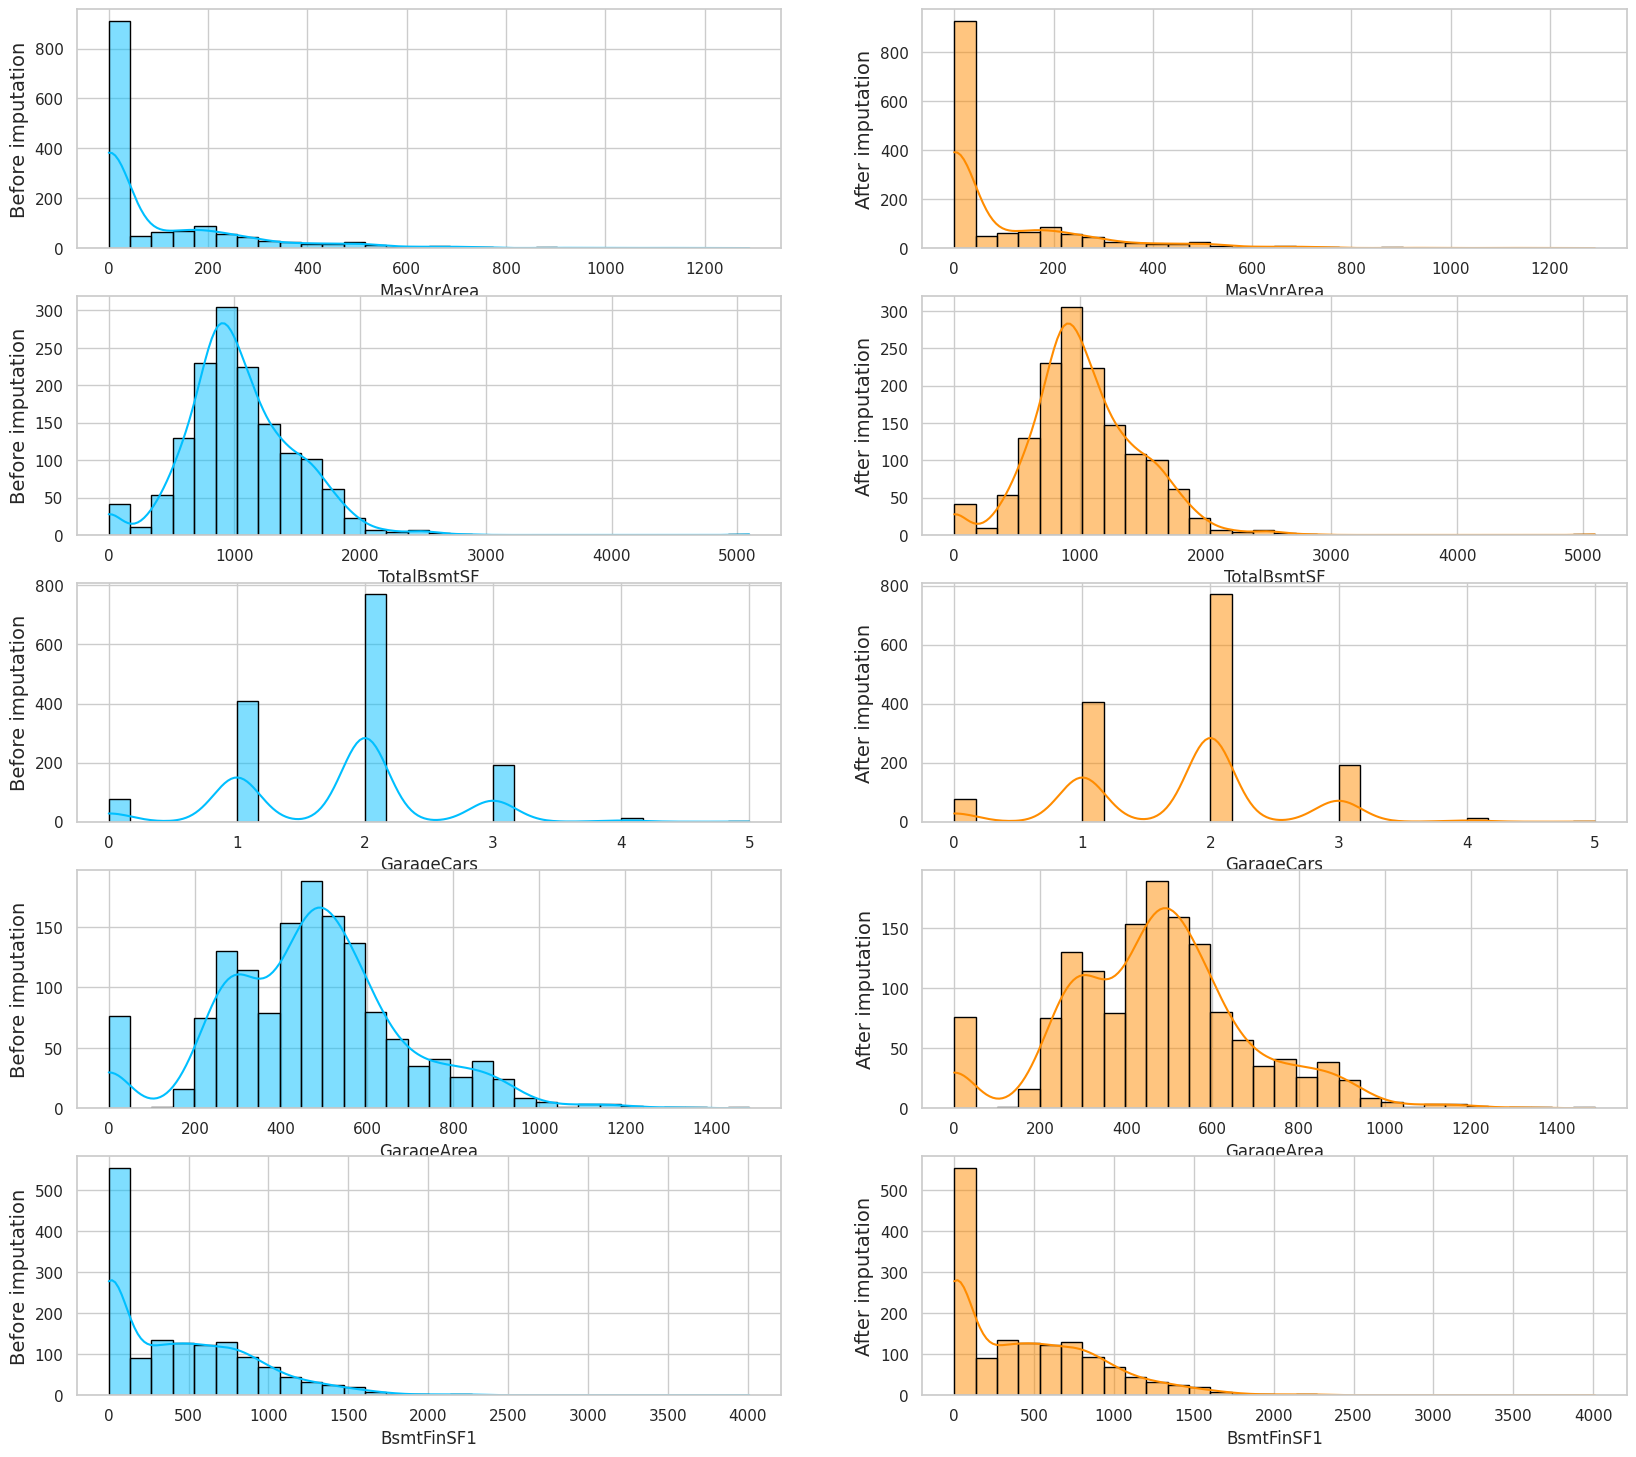

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 6)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="deepskyblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="darkorange", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

# I.3 Categorical features

## I.3.1. Explore and clean Categorical features

In [ ]:
# Categorical to Quantitative relationship

# categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"] # -->list comprehension

# for-loop
categorical_features = []
for feat, feat_type in zip(df_train.columns, df_train.dtypes):
    if feat_type == 'object':
       categorical_features.append(feat)

# Include target variable
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

df_test_categ.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RH   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0        NAmes      Feedr  ...     Attchd          Unf         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
3      Gilbert       Norm  ...     Attchd          Fin         TA         TA   
4      StoneBr       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN  MnPrv         NaN       WD        Normal  
1          Y    NaN    NaN        Gar2       WD        Normal  
2          Y    NaN  MnPrv         NaN       WD        Normal  
3          Y    NaN    NaN         NaN       WD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

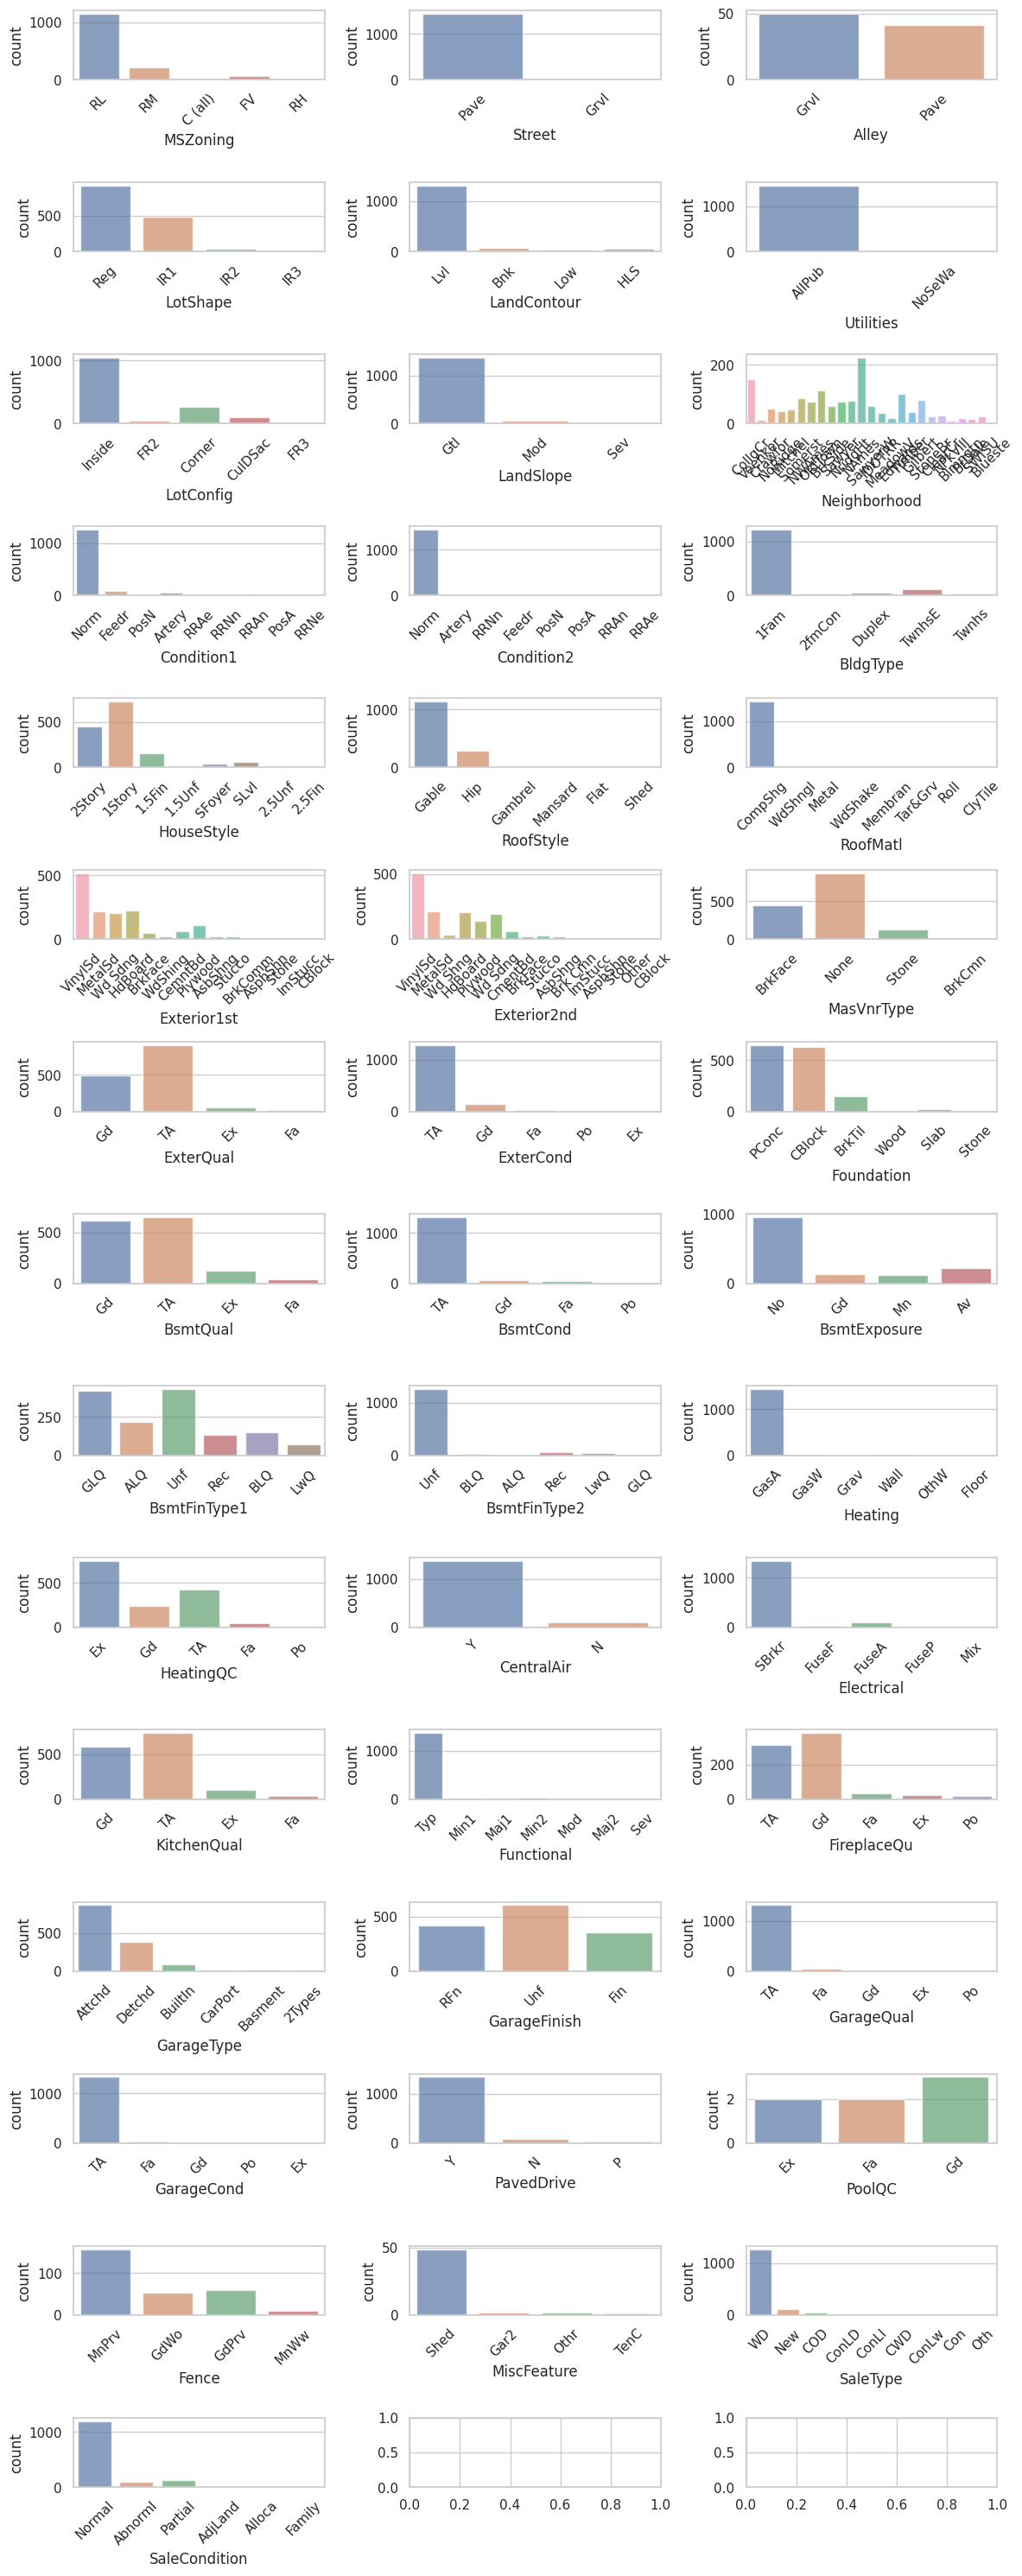

In [ ]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    round(len(df_train_categ.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax)

fig.tight_layout()

In [ ]:
# Drop some categorical 'non-informative' features from train set
columns_to_drop = [
    'Street', 'Alley', 'LandContour',
    'Utilities', 'LandSlope', 'Condition2',
    'RoofMatl', 'CentralAir', 'BsmtFinType2',
    'Heating', 'Functional','GarageQual',
    'GarageCond','ExterCond','MiscFeature',
    'PavedDrive', 'SaleType'
]

In [ ]:
# Train set
df_train_categ.drop(columns_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(columns_to_drop, axis=1, inplace=True)

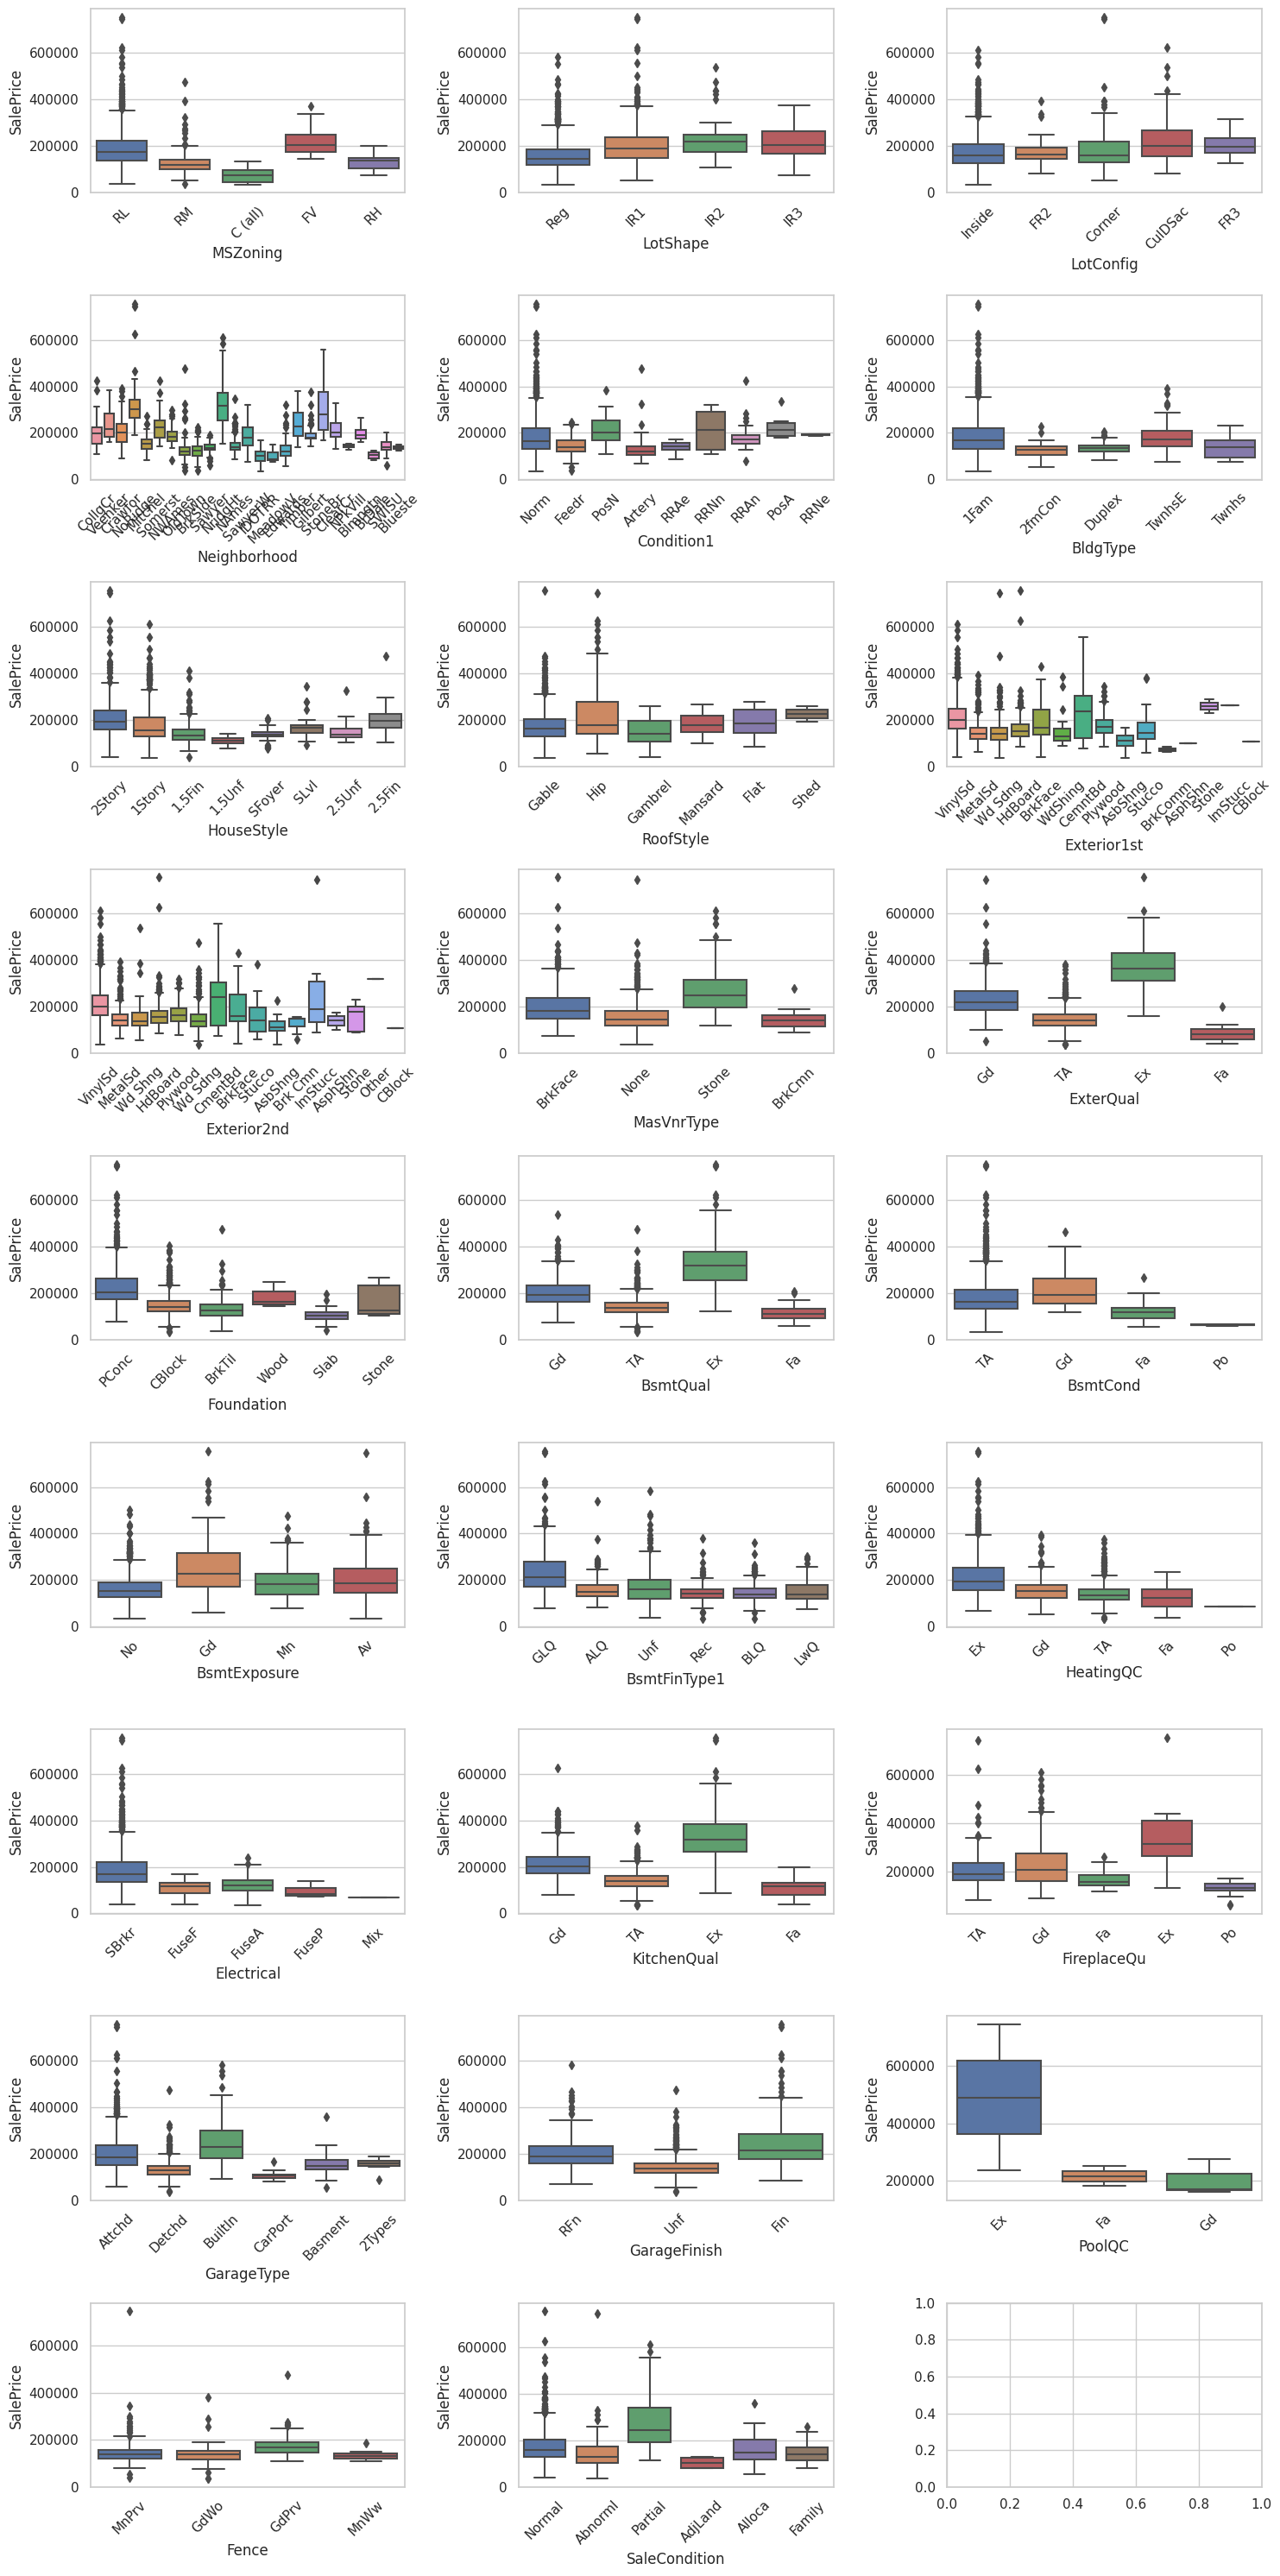

In [ ]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(
            x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax)

fig.tight_layout()

In [ ]:
df_train_categ["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [ ]:
df_train_categ["Exterior2nd"].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

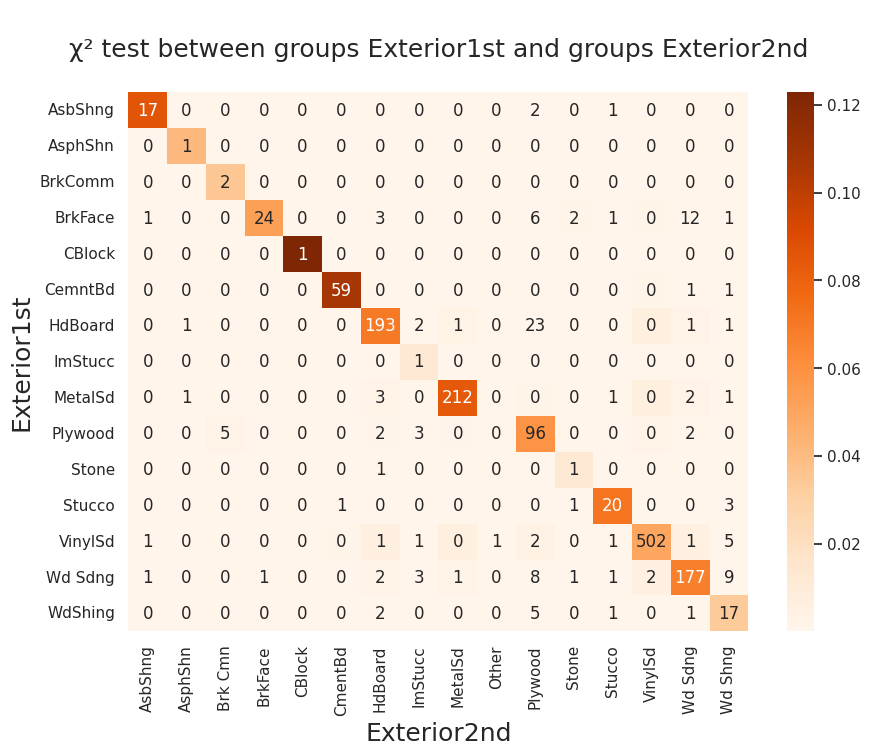

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0



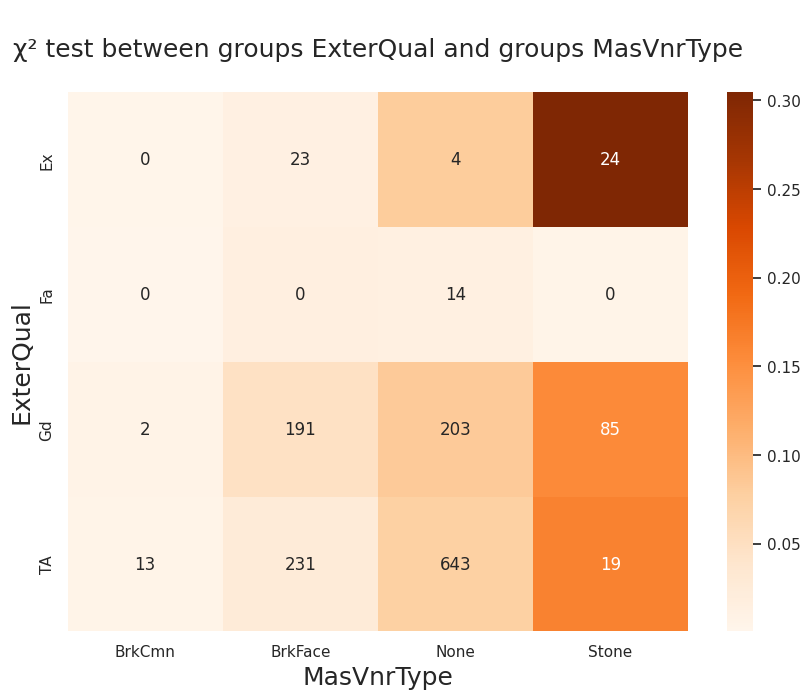

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54



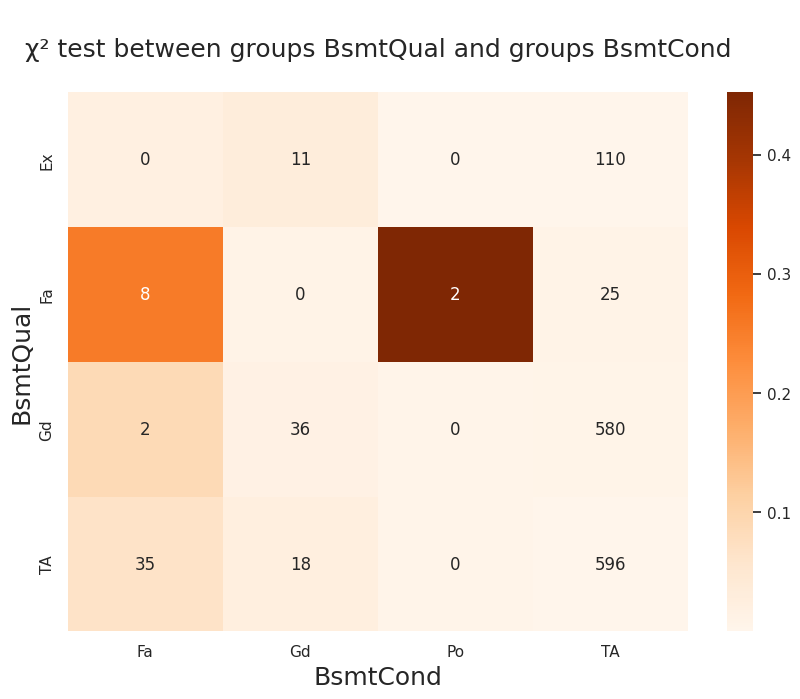

P-Value of the ChiSq Test bewteen BsmtQual and BsmtCond is: 1.9371809126533347e-31



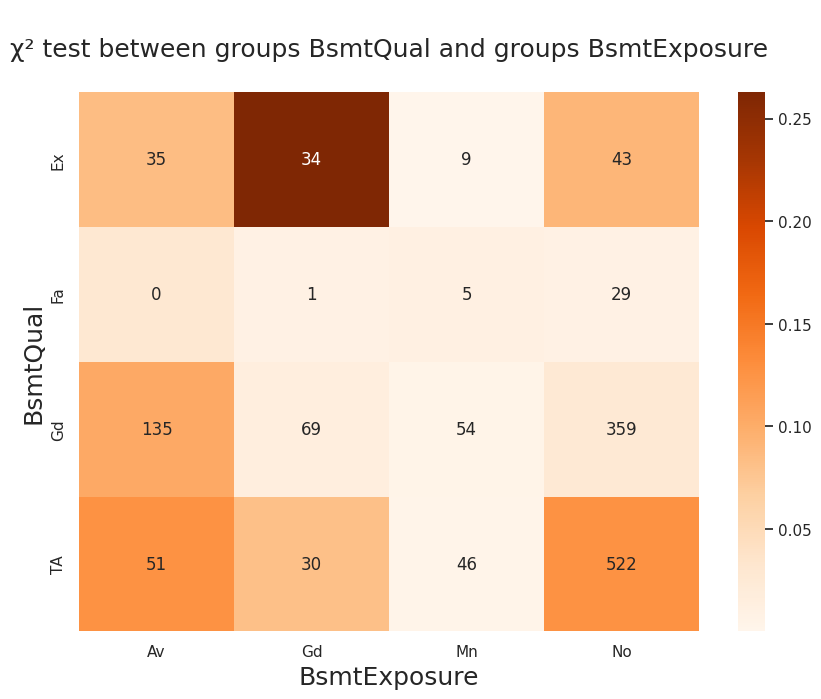

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [ ]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual", "BsmtQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtCond", "BsmtExposure"]

for i, j in zip(X, Y):

    # Contingency table
    cont = df_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(df_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

In [ ]:
# Let's drop the one of each co-dependent variables
# Train set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

## I.3.2 Missing data of Categorical features

Train Set

Text(0, 0.5, 'Column Name\n')

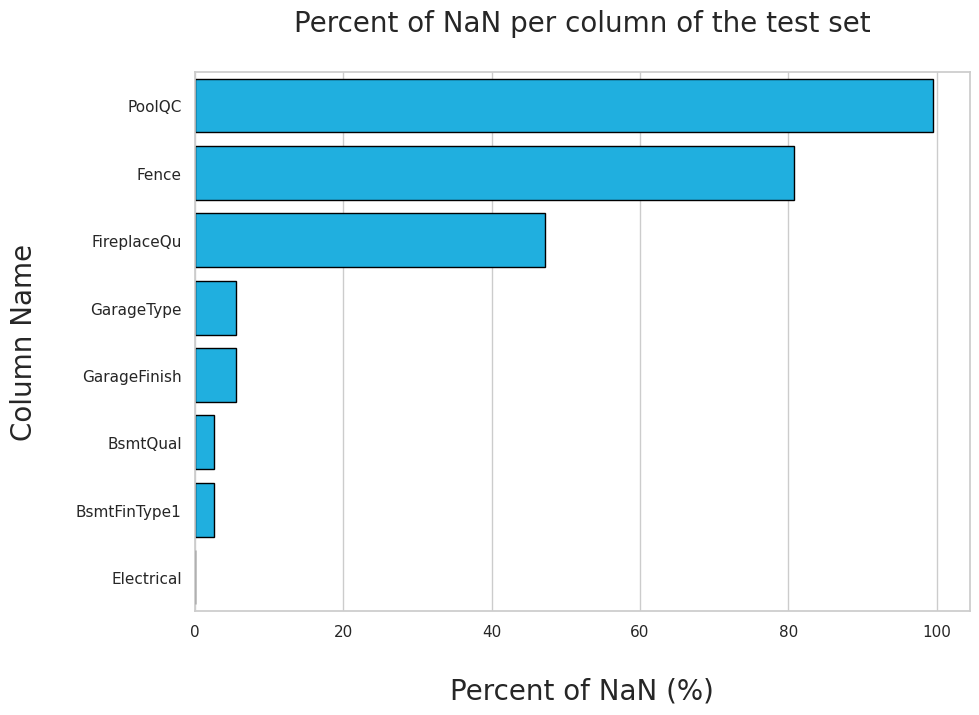

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
tab[tab.Percent_NaN > 5]

Column  Percent_NaN
6        PoolQC        99.52
7         Fence        80.75
3   FireplaceQu        47.26
4    GarageType         5.55
5  GarageFinish         5.55

In [ ]:
# Drop the features where the percentage of NaN is higher than 5%
df_train_categ.drop(
    ["PoolQC", "Fence", "FireplaceQu", "GarageType", "GarageFinish"],
    axis=1,
    inplace=True
)

In [ ]:
df_train_categ["BsmtQual"].mode()

0    TA
Name: BsmtQual, dtype: object

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {
    "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
    "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
    "Electrical": df_train_categ["Electrical"].mode().iloc[0]
}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)

Test Set

In [ ]:
# Drop the same features from test set as for the train set
df_test_categ.drop(
    ["PoolQC", "Fence", "FireplaceQu","GarageType", "GarageFinish"],
    axis=1,
    inplace=True
)

Text(0, 0.5, 'Column Name\n')

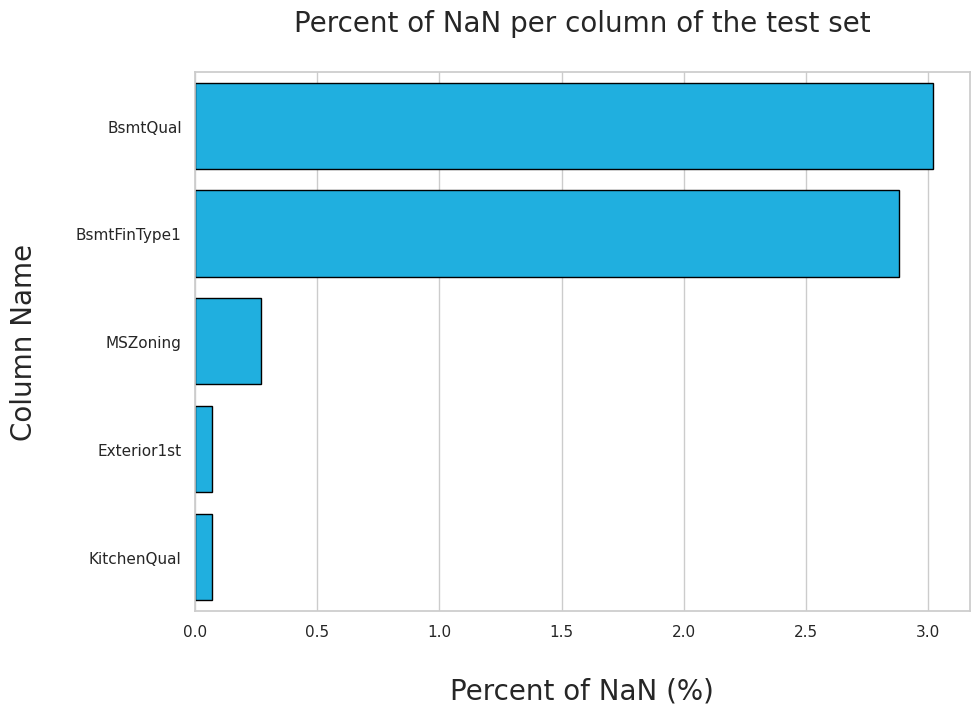

In [ ]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="deepskyblue")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [ ]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_train_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_train_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_train_categ["KitchenQual"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)

Mengisi NaN value pada test set menggunakan modus (mean,median) dari training set, karena:

1. Data Tes Tidak Boleh "Melihat" Data Latih: Dalam pengembangan model machine learning, data tes seharusnya tidak "melihat" atau "mempelajari" data latih. Ini berarti data tes harus digunakan untuk menguji model secara independen setelah model dilatih menggunakan data latih. Jika kita mengisi nilai-nilai yang hilang pada data tes dengan modus dari data tes itu sendiri, maka data tes akan memiliki informasi tentang distribusi nilai-nilai yang hilang dalam data tes itu sendiri. Ini bisa menyebabkan bias dalam pengujian model.

2. Konsistensi: Untuk memastikan konsistensi antara data latih dan data tes, lebih baik mengisi nilai-nilai yang hilang dalam data tes dengan modus dari data latih. Dengan cara ini, kita memastikan bahwa data tes diisi dengan nilai-nilai yang paling umum dari data latih, yang seharusnya mencerminkan distribusi nilai-nilai yang hilang dalam kasus penggunaan model di dunia nyata.

3. Generalisasi: Model machine learning diharapkan untuk memiliki kemampuan generalisasi, yaitu kemampuan untuk memberikan hasil yang baik pada data yang belum pernah dilihat sebelumnya. Dengan mengisi nilai-nilai yang hilang dalam data tes dengan modus dari data latih, kita mengasumsikan bahwa distribusi nilai-nilai yang hilang dalam data tes akan mirip dengan distribusi dalam data latih, yang seharusnya membantu model dalam melakukan prediksi yang lebih baik pada data tes yang sebenarnya.

Jadi, intinya adalah agar pengujian model di data tes lebih realistis dan tidak memengaruhi kinerja model, nilai-nilai yang hilang dalam data tes diisi dengan referensi ke data latih, bukan dengan modus dari data tes itu sendiri.

## I.3.3. Transform Categorical features into Binary features (get_dummies)

In [ ]:
# Train set
for i in df_train_categ.columns.tolist()[:-1]:
    df_dummies = pd.get_dummies(df_train_categ[i], prefix=i)

    # merge both tables
    df_train_categ = df_train_categ.join(df_dummies)

# Select the binary features only
df_train_binary = df_train_categ.iloc[:, 18:]
df_train_binary.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             0             0             0             1                 0   
2             1             0             0             0                 0   
3             1             0             0             0                 1   
4             1             0             0             0                 0   

   ...  KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
0  ...               0               0               1               0   
1  ...               0               0               0               1   
2  ...               0               0               1               0   
3  ...               0               0               1               0   
4  ...               0               0               1               0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 122 columns]

In [ ]:
# Test set
for i in df_test_categ.columns.tolist():
    df_dummies = pd.get_dummies(df_test_categ[i], prefix=i)

    # merge both tables
    df_test_categ = df_test_categ.join(df_dummies)

# Select the binary features only
df_test_binary = df_test_categ.iloc[:, 17:]
df_test_binary.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            1            0            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_Corner  \
0             0             0             0             1                 0   
1             1             0             0             0                 1   
2             1             0             0             0                 0   
3             1             0             0             0                 0   
4             1             0             0             0                 0   

   ...  KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  \
0  ...               0               0               0               1   
1  ...               0               0               1               0   
2  ...               0               0               0               1   
3  ...               0               0               1               0   
4  ...               0               0               1               0   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 118 columns]

In [ ]:
# Let's check if the column headings are the same in both data set, df_train and df_test
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Electrical_Mix']

Features present in df_test_categ set and absent in df_train_categ: []


In [ ]:
# Let's drop these columns from df_train_binary
df_train_binary.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data set
dif_1 = [x for x in df_train_binary.columns if x not in df_test_binary.columns]
print(
    f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in df_test_binary.columns if x not in df_train_binary.columns]
print(
    f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


# I.4. Merge numerical and binary features into one data set

In [ ]:
# Add binary features to numreical features
# Train set
df_train_new = df_train_imputed.join(df_train_binary)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = df_test_imputed.join(df_test_binary)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 135)
Test set: (1459, 134)


## I.5. Drop outliers from the train set

In [ ]:
# Drop "WoodDeckSF" and "OpenPorchSF" --> See Numerical Features Viz
df_train_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)
df_test_new.drop(["WoodDeckSF", "OpenPorchSF"], axis=1, inplace=True)

In [ ]:
df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)]

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
523         10.00   2,007.00      2,008.00     3,138.00  3,138.00   4,676.00   
1298        10.00   2,008.00      2,008.00     6,110.00  4,692.00   5,642.00   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  ...  KitchenQual_Ex  \
523       3.00         11.00        3.00      884.00  ...               1   
1298      2.00         12.00        2.00    1,418.00  ...               1   

      KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  SaleCondition_Abnorml  \
523                0               0               0                      0   
1298               0               0               0                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
523                       0                     0                     0   
1298                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
523                      0                      1  
1298                     0                      1  

[2 rows x 133 columns]

In [ ]:
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

outliers1

[523, 1298]

**outliers = list(set(outliers))**: Setelah menggabungkan ketiga set outliers menjadi satu, langkah selanjutnya adalah menghilangkan elemen-elemen yang duplikat (jika ada) dalam set outliers tersebut. Untuk melakukan ini, kita mengonversi outliers menjadi set dengan set(outliers), yang akan secara otomatis menghilangkan duplikat. Kemudian, kita mengonversi set kembali menjadi list dengan list(set(outliers)) sehingga kita memiliki list tunggal yang berisi elemen-elemen unik dari outliers.

In [ ]:
# Let's handle the outliers in "GrLivArea", "TotalBsmtSF" and "GarageArea"
# Outliers in "GrLivArea"
outliers1 = df_train_new[(df_train_new["GrLivArea"] > 4000) & (
    df_train_new["SalePrice"] <= 200000)].index.tolist()

# Outliers in "TotalBsmtSF"
outliers2 = df_train_new[(df_train_new["TotalBsmtSF"] > 3000) & (
    df_train_new["SalePrice"] <= 400000)].index.tolist()

# Outliers in "GarageArea"
outliers3 = df_train_new[(df_train_new["GarageArea"] > 1200) & (
    df_train_new["SalePrice"] <= 300000)].index.tolist()

# List of all the outliers
outliers = outliers1 + outliers2 + outliers3
outliers = list(set(outliers))
print(outliers)

# Drop these outlier
df_train_new = df_train_new.drop(df_train_new.index[outliers])

# Reset index
df_train_new = df_train_new.reset_index().drop("index", axis=1)

[1061, 581, 1190, 523, 332, 1298]


# II. Feature engineering

In [ ]:
# Define a function to calculate the occupancy rate of the first floor of the total living area


def floor_occupation(x):
    """First floor occupation of the total live area

    floor_occupation equation has the following form:
    (1st Floor Area * 100) / (Ground Live Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Ground Live Area = 0
        equation -- if Ground Live Area > 0
    """
    if x["GrLivArea"] == 0:
        return 0
    else:
        return x["1stFlrSF"] * 100 / x["GrLivArea"]


# Apply the function on train and test set
df_train_new["1stFlrPercent"] = df_train_new.apply(
    lambda x: floor_occupation(x), axis=1)

df_test_new["1stFlrPercent"] = df_test_new.apply(
    lambda x: floor_occupation(x), axis=1)

# Drop "1stFlrSF" and "2ndFlrSF"
df_train_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
df_test_new.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [ ]:
# Define a function to calculate the occupancy rate of the finished basement area


def bsmt_finish(x):
    """Propotion of finished area in basement

    bsmt_finish equation has the following form:
    (Finished Basement Area * 100) / (Total Basement Area)

    Args:
        x -- the corresponding feature

    Returns:
        0 -- if Total Basement Area = 0
        equation -- if Total Basement Area > 0
    """
    if x["TotalBsmtSF"] == 0:
        return 0
    else:
        return x["BsmtFinSF1"] * 100 / x["TotalBsmtSF"]


# Apply the function on train and test set
df_train_new["BsmtFinPercent"] = df_train_new.apply(
    lambda x: bsmt_finish(x), axis=1)

df_test_new["BsmtFinPercent"] = df_test_new.apply(
    lambda x: bsmt_finish(x), axis=1)

# Drop "BsmtFinSF1"
df_train_new.drop(["BsmtFinSF1"], axis=1, inplace=True)
df_test_new.drop(["BsmtFinSF1"], axis=1, inplace=True)

In [ ]:
# Convert Year of construction to Age of the house since the construction
df_train_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"]

df_test_new["AgeSinceConst"] = df_train_new["YearBuilt"].max() - df_test_new["YearBuilt"]

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [ ]:
df_train_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"]

df_test_new["AgeSinceRemod"] = df_train_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"]

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [ ]:
continuous_features = [
    "OverallQual", "TotalBsmtSF", "GrLivArea",
    "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea",
    "MasVnrArea", "Fireplaces", "1stFlrPercent",
    "BsmtFinPercent", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]

In [ ]:
# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features,
                          "Abs_Skew": skew_ft})

sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['GrLivArea', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces', 'AgeSinceConst', 'AgeSinceRemod']


Dengan mengambil nilai absolut dari skewness, kita dapat dengan mudah mengidentifikasi fitur-fitur yang memiliki distribusi yang miring, baik itu miring ke kanan atau miring ke kiri, tanpa perlu memperhatikan arah kemiringannya

In [ ]:
# Log transformation of the skewed features
# sf_features = ["TotalBsmtSF", "GrLivArea", "MasVnrArea", "GarageArea"]

for i in sk_features:
    # loop over i (features) to calculate Log of surfaces
    # Train set
    df_train_new[i] = np.log((df_train_new[i])+1)

    # Test set
    df_test_new[i] = np.log((df_test_new[i])+1)

Transformasi logaritma ini dapat membantu dalam mengatasi masalah skewness dan membuat distribusi data lebih mendekati distribusi normal

# III. Preparing data for modeling

## III.1 Target variable 'SalePrice'

Text(0, 0.5, '')

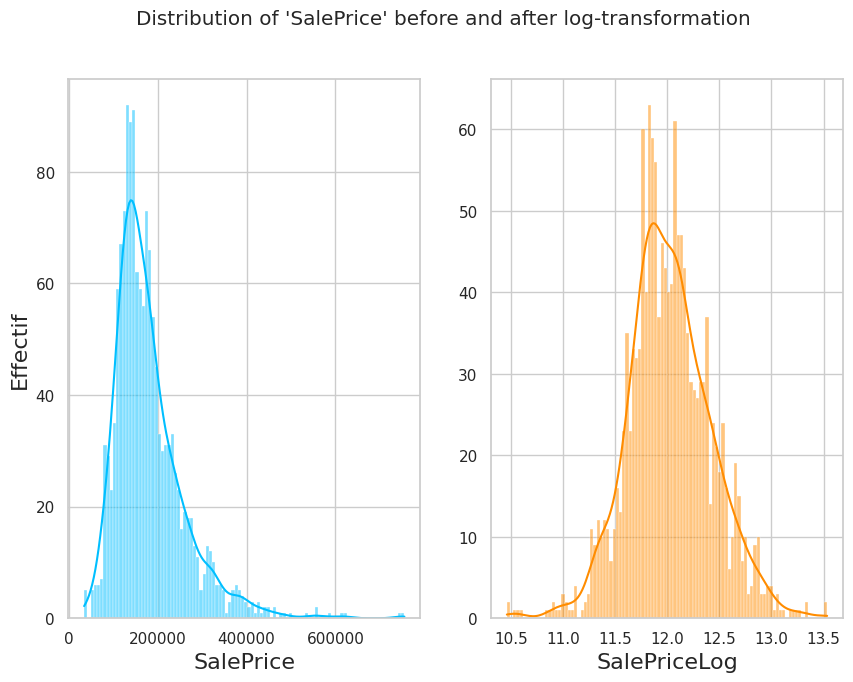

In [ ]:
# Log transformation of the target variable "SalePrice"
df_train_new["SalePriceLog"] = np.log(df_train_new.SalePrice)

# Plot the distribution before and after transformation
fig, axes = plt.subplots(1, 2)
fig.suptitle("Distribution of 'SalePrice' before and after log-transformation")

# before log transformation
p = sns.histplot(ax=axes[0], x=df_train_new["SalePrice"],
                 kde=True, bins=100, color="deepskyblue")
p.set_xlabel("SalePrice", fontsize=16)
p.set_ylabel("Effectif", fontsize=16)

# after log transformation
q = sns.histplot(ax=axes[1], x=df_train_new["SalePriceLog"],
                 kde=True, bins=100, color="darkorange")
q.set_xlabel("SalePriceLog", fontsize=16)
q.set_ylabel("", fontsize=16)

In [ ]:
# Drop the original SalePrice
df_train_new.drop(["SalePrice"], axis=1, inplace=True)

## III.2. Split data into train and test set and Standardization

In [ ]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train_new[[i for i in list(df_train_new.columns) if i != "SalePriceLog"]]
# X = df_train_new.drop(columns=["SalePriceLog"])
print(X.shape)

# Target (y)
y = df_train_new.loc[:, "SalePriceLog"]
print(y.shape)

(1454, 131)
(1454,)


1. Stratifikasi yang Seimbang: Dalam masalah klasifikasi atau regresi, penting untuk memastikan bahwa dataset yang digunakan untuk pelatihan dan pengujian mencerminkan distribusi kelas atau nilai target yang sebenarnya. Dengan membuat bins, kita dapat mengelompokkan data target menjadi beberapa kelas atau interval yang lebih sedikit, sehingga dapat melakukan stratifikasi yang lebih baik. Stratifikasi memastikan bahwa distribusi kelas dalam subset pelatihan dan pengujian mirip, yang menghindari masalah ketidakseimbangan kelas.


2. Mengatasi Masalah Data Kontinu: Beberapa algoritma memerlukan data yang bersifat diskret atau kategori. Dengan membuat bins, kita dapat mengubah data kontinu menjadi data yang bersifat diskret dengan mengelompokkan nilainya ke dalam interval tertentu. Ini dapat membantu algoritma yang membutuhkan data diskret atau yang lebih cocok untuk bekerja dengan data yang bersifat kategorikal.


3. Meningkatkan Kinerja Model: Stratifikasi yang baik dapat menghasilkan model yang lebih baik, terutama ketika distribusi kelas atau nilai target sangat tidak seimbang. Dengan stratifikasi yang baik, setiap subset (pelatihan dan pengujian) akan mencakup representasi yang cukup dari setiap kelas atau interval nilai, sehingga model dapat belajar dengan lebih baik.

In [ ]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y_binned, shuffle=True)

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1163, 131)
y_train:(1163,)

X_test:(291, 131)
y_test:(291,)


**y_binned = np.digitize(y, bins)**: Di sini, kita menggunakan fungsi np.digitize() untuk mengelompokkan setiap nilai dalam y (variabel target) ke dalam bin yang sesuai berdasarkan nilai-nilai bin yang telah dibuat sebelumnya. Hasilnya adalah array y_binned yang berisi nomor bin (kelas) yang sesuai dengan setiap nilai dalam y. Ini digunakan untuk melakukan stratifikasi data berdasarkan kelas-kelas ini.

In [ ]:
# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# The same standardization is applied for df_test_new
df_test_new = std_scale.transform(df_test_new)

# The output of standardization is a vector. Let's turn it into a table
# Convert X, y and test data into dataframe
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
df_test_new = pd.DataFrame(df_test_new, columns=X.columns)

y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index().drop("index", axis=1)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index().drop("index", axis=1)

 - .fit(): Menghitung parameter transformasi dari data pelatihan.

 - .transform(): Mengaplikasikan transformasi pada data dengan parameter yang telah dihitung sebelumnya.

 - .fit_transform(): Menghitung dan mengaplikasikan transformasi pada data pelatihan dalam satu langkah.

## III.3. Backward Stepwise Regression

In [ ]:
Selected_Features = []


def backward_regression(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_in -- pvalue threshold of features to keep
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X_train, y_train)

worst_feature : Foundation_PConc, 0.9893850849866337 
worst_feature : Exterior1st_VinylSd, 0.9818285991576512 
worst_feature : Exterior1st_HdBoard, 0.9870793482015568 
worst_feature : HeatingQC_Gd, 0.9814873983165693 
worst_feature : Neighborhood_NPkVill, 0.9420553047685167 
worst_feature : Neighborhood_Somerst, 0.9342991599678577 
worst_feature : Neighborhood_NWAmes, 0.9754973486580962 
worst_feature : Neighborhood_Blmngtn, 0.9327537028470203 
worst_feature : Neighborhood_NAmes, 0.9414082039766665 
worst_feature : ExterQual_Ex, 0.9177534586652604 
worst_feature : Neighborhood_Blueste, 0.9093700637043824 
worst_feature : KitchenQual_Gd, 0.9065288041549899 
worst_feature : Condition1_PosN, 0.8600893533735612 
worst_feature : Condition1_RRAn, 0.9752782017706396 
worst_feature : Condition1_PosA, 0.8553665293068975 
worst_feature : HeatingQC_Po, 0.8407919727031063 
worst_feature : Condition1_RRNe, 0.838042903907315 
worst_feature : KitchenQual_Fa, 0.8004184990410625 
worst_feature : ExterQ

In [ ]:
Selected_Features

[['OverallQual',
  'TotalBsmtSF',
  'GrLivArea',
  'GarageCars',
  'GarageArea',
  'Fireplaces',
  'MSZoning_C (all)',
  'MSZoning_FV',
  'MSZoning_RL',
  'LotShape_IR2',
  'LotConfig_CulDSac',
  'Neighborhood_ClearCr',
  'Neighborhood_Crawfor',
  'Neighborhood_Edwards',
  'Neighborhood_NoRidge',
  'Neighborhood_NridgHt',
  'Neighborhood_OldTown',
  'Neighborhood_StoneBr',
  'Neighborhood_Veenker',
  'Condition1_Norm',
  'Condition1_RRAe',
  'BldgType_1Fam',
  'BldgType_Twnhs',
  'Exterior1st_BrkComm',
  'Exterior1st_BrkFace',
  'Exterior1st_Wd Sdng',
  'Foundation_BrkTil',
  'Foundation_Wood',
  'BsmtQual_Ex',
  'BsmtFinType1_LwQ',
  'BsmtFinType1_Rec',
  'HeatingQC_Ex',
  'HeatingQC_Fa',
  'HeatingQC_TA',
  'Electrical_FuseA',
  'Electrical_FuseF',
  'Electrical_FuseP',
  'Electrical_SBrkr',
  'KitchenQual_Ex',
  'SaleCondition_Abnorml',
  'SaleCondition_Family',
  'SaleCondition_Normal',
  'BsmtFinPercent',
  'AgeSinceRemod']]

In [ ]:
# Keep the selected features only
X_train = X_train.loc[:, Selected_Features[0]]
X_test = X_test.loc[:, Selected_Features[0]]
df_test_new = df_test_new.loc[:, Selected_Features[0]]

## III.4. Variance Inflation Factor

In [ ]:
# Here I calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]
#X_train.shape[1] memberikan jumlah fitur atau kolom dalam dataset X_train.

# VIF results in a table
vif["features"] = X_train.columns
vif.round(1)

VIF Factor               features
0         3.30            OverallQual
1         1.80            TotalBsmtSF
2         2.20              GrLivArea
3         5.40             GarageCars
4         5.30             GarageArea
5         1.50             Fireplaces
6         1.10       MSZoning_C (all)
7         1.60            MSZoning_FV
8         2.20            MSZoning_RL
9         1.10           LotShape_IR2
10        1.10      LotConfig_CulDSac
11        1.10   Neighborhood_ClearCr
12        1.10   Neighborhood_Crawfor
13        1.20   Neighborhood_Edwards
14        1.20   Neighborhood_NoRidge
15        1.60   Neighborhood_NridgHt
16        1.60   Neighborhood_OldTown
17        1.20   Neighborhood_StoneBr
18        1.10   Neighborhood_Veenker
19        1.20        Condition1_Norm
20        1.10        Condition1_RRAe
21        1.40          BldgType_1Fam
22        1.30         BldgType_Twnhs
23        1.10    Exterior1st_BrkComm
24        1.10    Exterior1st_BrkFace
25        1.20    Exterior1st_Wd Sdng
26        1.50      Foundation_BrkTil
27        1.00        Foundation_Wood
28        1.80            BsmtQual_Ex
29        1.10       BsmtFinType1_LwQ
30        1.10       BsmtFinType1_Rec
31        2.40           HeatingQC_Ex
32        1.30           HeatingQC_Fa
33        2.20           HeatingQC_TA
34       71.70       Electrical_FuseA
35       25.40       Electrical_FuseF
36        4.10       Electrical_FuseP
37       95.80       Electrical_SBrkr
38        1.60         KitchenQual_Ex
39        2.10  SaleCondition_Abnorml
40        1.20   SaleCondition_Family
41        2.40   SaleCondition_Normal
42        1.20         BsmtFinPercent
43        2.40          AgeSinceRemod

In [ ]:
# Select features with high VIF
high_vif_list = vif[vif["VIF Factor"] > 10]["features"].tolist()

if len(high_vif_list) == 0:
    # print empty list if low multicolinearity
    print(f"None of the features have a high multicollinearity")
else:
    # print list of features with high multicolinearity
    print(f"List of features with high multicollinearity: {high_vif_list}")

List of features with high multicollinearity: ['Electrical_FuseA', 'Electrical_FuseF', 'Electrical_SBrkr']


In [ ]:
# Drop features with high multicollinearity from X_train, X_test and df_test_new
X_train.drop(high_vif_list, axis=1, inplace=True)

X_test.drop(high_vif_list, axis=1, inplace=True)

df_test_new.drop(high_vif_list, axis=1, inplace=True)

## III.5. Cook distance

In [ ]:
X_constant = sm.add_constant(X_train)

model = sm.OLS(y_train, X_constant)
lr = model.fit()

# Cook distance
np.set_printoptions(suppress=True)

# Create an instance of influence
influence = lr.get_influence()

# Get Cook's distance for each observation
cooks = influence.cooks_distance

# Result as a dataframe
cook_df = pd.DataFrame({"Cook_Distance": cooks[0], "p_value": cooks[1]})
cook_df.head()

Cook_Distance  p_value
0           0.00     1.00
1           0.00     1.00
2           0.00     1.00
3           0.00     1.00
4           0.00     1.00

In [ ]:
cook_df.shape

(1163, 2)

In [ ]:
# Remove the influential observation from X_train and y_train
influent_observation = cook_df[cook_df["p_value"] < 0.05].index.tolist()
print(f"Influential observations dropped: {influent_observation}")

# Drop these obsrevations
X_train = X_train.drop(X_train.index[influent_observation])
y_train = y_train.drop(y_train.index[influent_observation])

Influential observations dropped: []


In [ ]:
influent_observation

[]

# IV. Modeling

## IV.1. Models and metrics selection

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [ ]:
# Define regression models
dtr = DecisionTreeRegressor()
ridge = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
rdf = RandomForestRegressor()
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Train models on X_train and y_train
for regr in [dtr, ridge, lasso, elastic, rdf, xgboost, lgbm]:
    # fit the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Print the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: DecisionTreeRegressor
R²: 0.7463237570299113
RMSE: 0.20265493925743927

- Regressor: Ridge
R²: 0.9094640007548491
RMSE: 0.121067603086924

- Regressor: Lasso
R²: 0.9095613507423448
RMSE: 0.12100249583846914

- Regressor: ElasticNet
R²: 0.9095483158304485
RMSE: 0.12101121556204462

- Regressor: RandomForestRegressor
R²: 0.870008030330355
RMSE: 0.1450693138135476

- Regressor: XGBRegressor
R²: 0.8776766822345579
RMSE: 0.1407252149180066

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1176
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 33
[LightGBM] [Info] Start training from score 12.022945
- Regressor: LGBMRegressor
R²: 0.8677055745829945
RMSE: 0.1463484296920441



## IV.2. Hyperparameters tuning and model optimization

### IV.2.1. Ridge regression

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 54.286754393238596}
Best R² (train): 0.9004162728586405


In [ ]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_mod.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.90882894705884
RMSE: 0.12149146804744718


In [ ]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

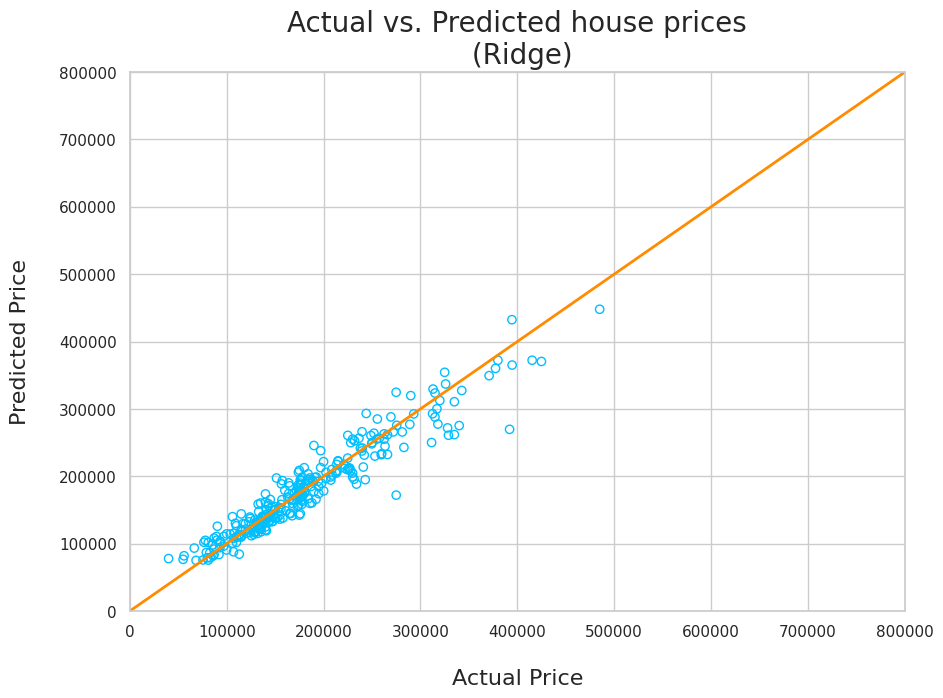

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### IV.2.2. Lasso regression

In [ ]:
# Define hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# define best parameter and R^2
best_parm = lasso_cv.best_params_
best_r2 = lasso_cv.best_score_

# print best params and the corresponding R²
print(f"Best hyperparameters: {best_parm}")
print(f"Best R² (train): {best_r2}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 0.0010985411419875584}
Best R² (train): 0.9000599004870058


In [ ]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=best_parm["alpha"])

# Fit the model on train set
lasso_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.9095548081387996
RMSE: 0.12100687260132052


In [ ]:
# Save the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

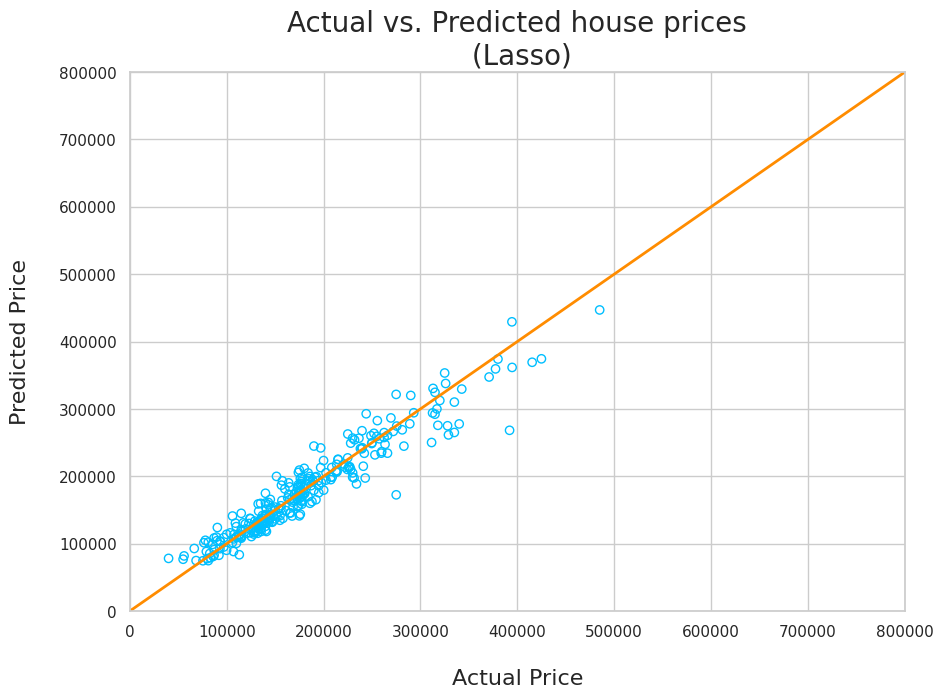

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (Lasso)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
print(f'List model : {model_list}\n')
print(f'List R2 Score : {r2_list}\n')
print(f'List RMSE Score : {rmse_list}')

List model : ['Ridge', 'XGBRegressor', 'Lasso']

List R2 Score : [0.9088, 0.8884, 0.9096]

List RMSE Score : [0.1215, 0.1344, 0.121]


### IV.2.3. XGBoost regression

In [ ]:
# Define hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8905822353619657


1. max_depth: Ini biasanya disarankan untuk tidak mengatur max_depth terlalu tinggi, karena pohon yang sangat dalam dapat menyebabkan overfitting. Nilai umum adalah antara 3 hingga 10, tergantung pada kompleksitas masalah.

2. colsample_bytree: Nilai ini mengontrol seberapa banyak fitur yang akan digunakan dalam setiap pohon. Sebagai panduan umum, Anda dapat mencoba nilai antara 0.3 hingga 0.8. Nilai yang lebih kecil akan menghasilkan model yang lebih konservatif, sedangkan nilai yang lebih besar dapat menyebabkan overfitting.

3. learning_rate: Ini mengatur seberapa besar langkah (learning rate) yang akan diambil pada setiap iterasi. Nilai yang lebih kecil (misalnya, 0.01) akan membuat model belajar lebih lambat tetapi lebih stabil, sedangkan nilai yang lebih besar (misalnya, 0.1) akan membuat model belajar lebih cepat tetapi dengan risiko overfitting.

4. n_estimators: Ini menentukan berapa banyak pohon yang akan digunakan dalam ensemble. Nilai yang lebih tinggi akan memberikan model yang lebih kuat, tetapi akan memerlukan lebih banyak waktu untuk melatih dan bisa lebih kompleks. Anda dapat mencoba beberapa nilai dan melihat bagaimana kinerja model berubah.

In [ ]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(seed=20,
                        colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
                        learning_rate=xgbr_cv.best_params_["learning_rate"],
                        max_depth=xgbr_cv.best_params_["max_depth"],
                        n_estimators=xgbr_cv.best_params_["n_estimators"])

# Fit the model on train set
xgbr_mod.fit(X_train, y_train)

# Predict on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- XGBRegressor
R²: 0.8883881595201916
RMSE: 0.1344226427873475


In [ ]:
# Save the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

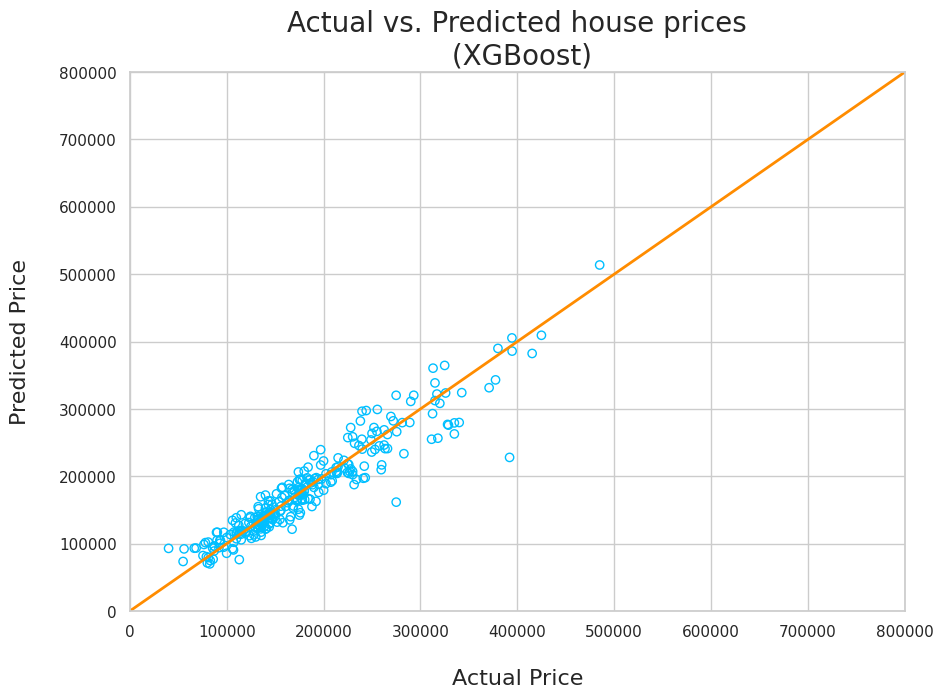

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

### IV.2.4. LightGBM regression

In [ ]:
# Define hyperparameters
tuned_parameters = {
                  "max_depth": [3],
                  "learning_rate": [0.01, 0.05, 0.1],
                  "n_estimators": [100, 500],
                  "num_leaves": [20],
                  "min_child_samples": [10],
                  "colsample_bytree": [0.3, 0.7],
                  "reg_alpha": [ 0.1, 0.5],
                  "reg_lambda": [0.1, 0.5]

}

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 1163, number of used features: 36
[LightGBM] [Info] Start training from score 12.022945
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = XGBRegressor(seed=20,
                        colsample_bytree=lgbm_cv.best_params_['colsample_bytree'],
                        learning_rate=lgbm_cv.best_params_['learning_rate'],
                        max_depth=lgbm_cv.best_params_['max_depth'],
                        min_child_samples=lgbm_cv.best_params_['min_child_samples'],
                        n_estimators=lgbm_cv.best_params_['n_estimators'],
                        num_leaves=lgbm_cv.best_params_['num_leaves'],
                        reg_alpha=lgbm_cv.best_params_['reg_alpha'],
                        reg_lambda=lgbm_cv.best_params_['reg_lambda'])

# Fit the model on train set
lgbm_mod.fit(X_train, y_train)

# Predict on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

[04:25:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_samples", "num_leaves" } are not used.

- XGBRegressor
R²: 0.8873058044763104
RMSE: 0.13507285156183096


In [ ]:
# Save the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

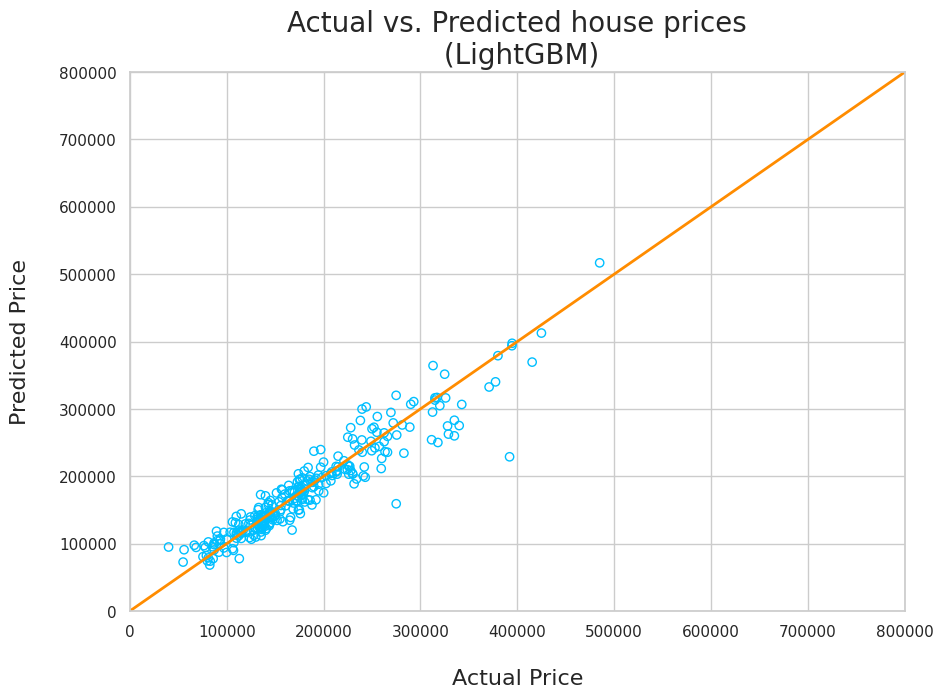

In [ ]:
# Plot Actual vs. Predicted house prices
actual_price = np.exp(y_test["SalePriceLog"])
predicted_price = np.exp(y_pred)

plt.figure()
plt.title("Actual vs. Predicted house prices\n (LightGBM)", fontsize=20)
plt.scatter(actual_price, predicted_price,
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [ ]:
print(f'List model : {model_list}\n')
print(f'List R2 Score : {r2_list}\n')
print(f'List RMSE Score : {rmse_list}')

List model : ['Ridge', 'XGBRegressor', 'Lasso', 'XGBRegressor']

List R2 Score : [0.9088, 0.8884, 0.9096, 0.8873]

List RMSE Score : [0.1215, 0.1344, 0.121, 0.1351]


## IV.3. Choosing the best model

Best Model **Lasso Regression**

# Conclusion!

Dari hasil di atas, kita dapat membuat kesimpulan :

- Model **Lasso** memiliki nilai R^2 yang tertinggi (0.9096) di antara semua model yang ada. Ini berarti model Lasso memiliki kemampuan yang paling baik dalam menjelaskan variasi dalam data target.

- Model **Ridge** juga memiliki nilai R^2 yang tinggi (0.9088), yang mendekati performa model Lasso. Ini menunjukkan bahwa Ridge juga adalah model yang baik, namun tidak sebaik Lasso.

- Model **XGBRegressor** dan **LGBMRegressor** memiliki nilai R^2 yang lebih rendah daripada Lasso dan Ridge, tetapi cukup tinggi (0.8884 dan 0.8873). Nilai R^2 lebih rendah, yang menunjukkan bahwa model XGBRegressor mungkin tidak sebaik Lasso dan Ridge dalam menjelaskan variasi dalam data target.

- Dalam hal RMSE, baik model Lasso maupun Ridge memiliki nilai RMSE yang rendah (0.1210 dan 0.1215), yang menunjukkan kesalahan prediksi yang kecil. Model XGBRegressor dan LGBMRegressor memiliki RMSE yang sedikit lebih tinggi (0.1344 dan 0.1351), yang menunjukkan kesalahan prediksi yang sedikit lebih besar.

Kesimpulan:
Berdasarkan hasil ini, model **Lasso** memiliki performa terbaik berdasarkan nilai R^2 yang tinggi dan RMSE yang rendah. Namun, model **Ridge** juga merupakan pilihan yang baik dengan performa yang hampir sebanding. Model **XGBRegressor**, meskipun masih cukup baik, memiliki R^2 yang sedikit lebih rendah dan RMSE yang lebih tinggi dibandingkan dengan Lasso dan Ridge.

Kembali lagi kesimpulan model mana yang akan kita pakai itu bergantung dengan permasalahan yang ingin kita selesaikan dan hasil uji coba pemakaian model tersebut dalam product dan akan dilakukan pengembangan kembali perlu dilakukan